# IMPORT

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (20.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [ ]:
pip install optuna==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.5 MB/s eta 0:00:00
  Created wheel for optuna: filename=optuna-2.0.0-py3-none-any.whl size=312821 sha256=421450509f0a3fa2a6b2ef7626312838794d3d34748979c43b744a26fafaa410
  Stored in directory: /root/.cache/pip/wheels/88/08/60/552399d1ae00b0d56554e4c0f80809c4c42a94de19e68cee

In [ ]:
pip install xgboost==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.5
    Uninstalling xgboost-1.7.5:
      Successfully uninstalled xgboost-1.7.5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 하이퍼파라미터 최적화 라이브러리
import optuna

# 그레디언트 부스팅 결정 트리 라이브러리
import xgboost as xgb

# 라벨 인코딩을 위한 라이브러리
from sklearn.preprocessing import LabelEncoder

# 랜덤포레스트 라이브러리
from sklearn.ensemble import RandomForestRegressor as rf

# 홀드아웃, 교차 검증을 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 정확도 계산 라이브러리
from sklearn.metrics import mean_squared_error # 평균제곱오차 (회귀에서 사용)

# lightgbm 라이브러리
import lightgbm as lgb

# 랜덤 시드 설정
np.random.seed(1234)
random.seed(1234)
# 스타일 설정
plt.style.use("ggplot")
# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
# 구글드라이브 사용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('경로/train.csv')
test_df = pd.read_csv('경로/test.csv')
submission = pd.read_csv('경로/sample_submission.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 벤치마크용 베이스라인 작성

: 성능 비교나 평가를 위한 기준이 되는 초기 모델 또는 알고리즘을 의미

LightGBM으로 예측

-> 각 변수의 중요도를 나타낼 수 있기 때문에 향후 처리의 우선순위 등을 생각하는 지표로 활용될 수 있음

### 데이터 전처리 (인코딩)

In [ ]:
# 학습 데이터의 변수 유형 확인하기
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# MSZoning : 판매처 용도의 분류
# 각 분류에 얼마나 많은 수의 값이 존재하는지 확인
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

object : 문자열 데이터

LightGBM에서 읽을 수 있는 것 : int, float, bool이므로 카테고리 변수로 변환해야 함

-> LabelEncoder 사용 ! 이때,

1. 학습 데이터와 테스트 데이터를 모두 변환시켜주는 과정 필요
2. 결측치(NaN)를 미리 임의의 문자열로 변환하거나 삭제 -> NA인 것에 의미가 있다면 NaN일때는 NaN을 삭제하기보다 결손을 나타내는 다른 값으로 대체하는 것이 필요 (ex, 차고의 값이 NaN일 때는 차고가 없음을 의미)

In [ ]:
# 학습 데이터와 테스트 데이터 결합
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


여기서 SalePrice값이 있으면 학습 데이터고, 없으면 테스트 데이터 !

에측을 실행할 때는 SalePrice의 유무를 사용하여 학습 데이터와 테스트 데이터로 분할

In [ ]:
# SalePrice열 확인
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [ ]:
# 데이터 타입이 object인 열 categories로 관리
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# 예를 들어 확인해보자면, Alley는 Grvl과 Pave로 두개의 값을 가짐
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [ ]:
# 모든 열의 결측치 값을 missing으로 바꾸기

for cat in categories:
  le = LabelEncoder()
  print(cat)

  all_df[cat].fillna("missing", inplace = True)
  le = le.fit(all_df[cat])
  all_df[cat] = le.transform(all_df[cat])
  all_df[cat] = all_df[cat].astype("category")
  # 단순 숫자로 변환되므로 데이터타입으로 카테고리변수임을 명시

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [ ]:
# 데이터타입이 object에서 category로 바뀐 것을 확인할 수 있음
all_df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

In [ ]:
# 학습 데이터와 테스트 데이터로 되돌리기 (SalePrice를 기준으로 분류)
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

### 교차 검증으로 모델 학습 / 예측

학습 데이터를 세 개로 분할하고, 각 데이터로 모델을 작성한 후 테스트 데이터에 대한 예측 정확도 평균을 구해보자

In [ ]:
# 분할 데이터 수 3으로 설정
folds = 3
kf = KFold(n_splits = folds)

In [ ]:
# 하이퍼파라미터 설정하기
lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

In [ ]:
# 설명 변수와 목적 변수 지정하기
# 목적 변수 : SalePrice
# 설명 변수 : 원래 데이터에서 SalePrice와 학습에 불필요한 Id를 삭제한 것
train_X = train_df_le.drop(["SalePrice", "Id"], axis = 1)
train_Y = train_df_le["SalePrice"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
rmses = [] # fold별 rmse 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값

  tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred))) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models.append(model_lgb)
  rmses.append(tmp_rmse)
  oof[val_index] = y_pred

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.57807e+09
[20]	valid_0's l2: 7.38516e+08
[30]	valid_0's l2: 5.93255e+08
[40]	valid_0's l2: 5.6061e+08
[50]	valid_0's l2: 5.48225e+08
[60]	valid_0's l2: 5.46182e+08
[70]	valid_0's l2: 5.51735e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.45194e+08
0.12719558859476138
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in 

[60]	valid_0's l2: 9.27892e+08
[70]	valid_0's l2: 9.20973e+08
[80]	valid_0's l2: 9.1853e+08
[90]	valid_0's l2: 9.0149e+08
[100]	valid_0's l2: 8.97013e+08
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 8.96476e+08
0.14795399816677407
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 75


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in 

[LightGBM] [Info] Start training from score 182112.591376
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.80296e+09
[20]	valid_0's l2: 1.02271e+09
[30]	valid_0's l2: 8.68838e+08
[40]	valid_0's l2: 8.41872e+08
[50]	valid_0's l2: 8.35433e+08
[60]	valid_0's l2: 8.28083e+08
[70]	valid_0's l2: 8.25289e+08
[80]	valid_0's l2: 8.25043e+08
Early stopping, best iteration is:
[66]	valid_0's l2: 8.20654e+08
0.1325997570084599


In [ ]:
# rmse 평균 계산
sum(rmses)/len(rmses)

0.1359164479233318

<Axes: >

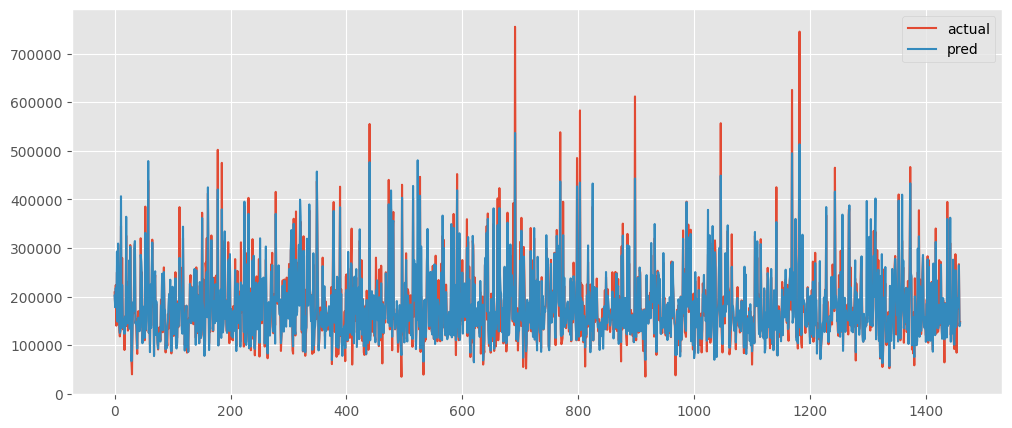

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

-> 파란 색이 빨간색을 어느정도 따르는 것으로 보임

-> 그러나 값이 많이 오를 때, 예측값이 충분히 커지지 않는 것을 확인할 수 있음

-> 이를 파악하고자 일반적인 경향과 다른 이상치를 검토할 필요가 있음

### 각 변수의 중요도 확인 (이상치 원인 탐색)

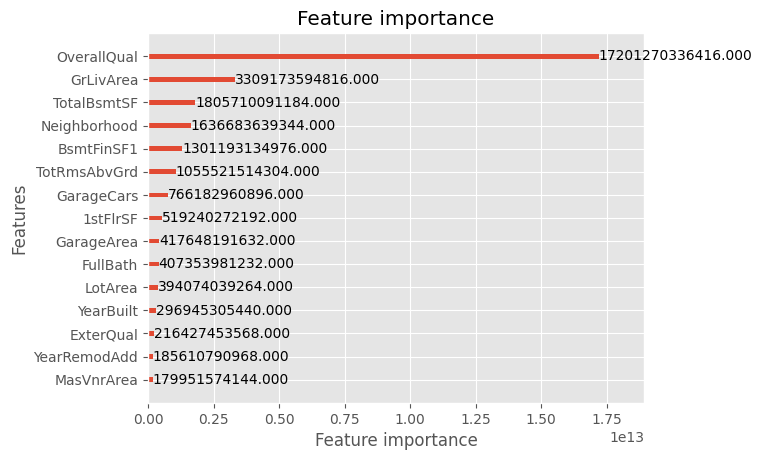

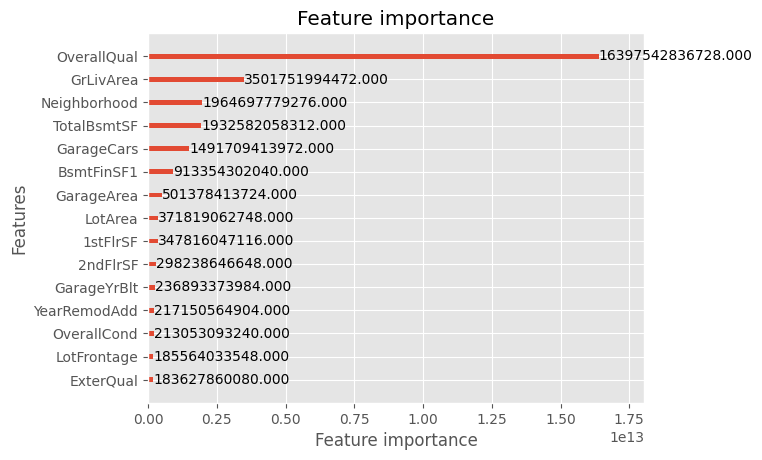

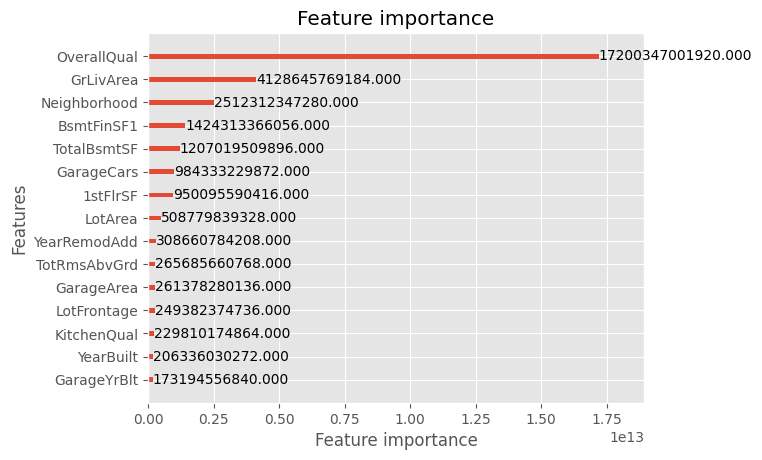

In [ ]:
# 상위 15개의 각 모델의 변수별 중요도 확인
for model in models:
  lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)

1. 모두 OverallQual(주택 전체의 재료와 마감 등 퀄리티, 1~10의 평가된 수)의 중요도가 가장 높음 -> 수치 데이터임에도 카테고리 변수인 데이터가 존재하며, 물론 Lightbgm은 결정 트리 알고리즘이기 때문에 수치형 카테고리 변수도 잘 처리하지만 카테고리 변수임을 확실히 지정할 경우 내부적으로 좀 더 적절히 처리됨 + 필요할 경우 꼭 이런 전처리 필요

2. GrLivArea(주거 영역의 크기)

3. TotalBsmtSF(지하실의 크기)

4. GarageCars(차고에 들어갈 수 있는 차의 대수)

5. GarageArea(차고 넓이)

6. GargeYrBlt(차고 연수) 등


-> 이렇게 중요도가 높은 것을 우선적으로 이상치를 확인하면 좋음

# 목적 변수 전처리

### SalePrice 분포 확인 (푸아송 분포)

In [ ]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

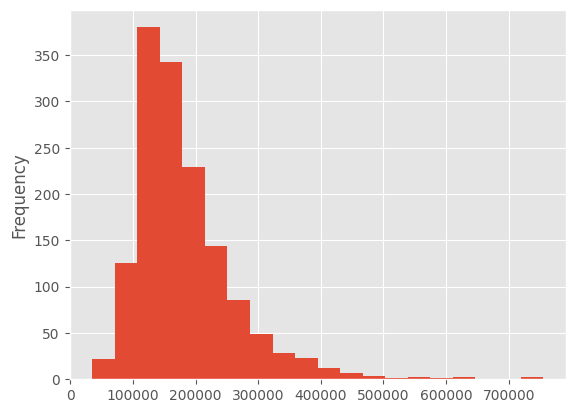

In [ ]:
train_df["SalePrice"].plot.hist(bins = 20)

-> 통계량의 평균과 중앙값은 평균 18만달러, 50%의 데이터가 약 16만달러 이내인 것으로 나옴

-> 그러나 히스토그램으로 확인하면 치우쳐있는 푸아송 분포를 보이는 특징을 확인할 수 있음

일반적으로 머신 러닝이나 통계 처리의 대부분은 데이터가 정규 분포임을 상정하고 있음 & 언뜻 보기에 16만 달러 부근에 데이터가 많이 존재하고 있으므로 그 차이를 50~60만달러 사이의 차이보다 상세하게 파악할 필요 존재

-> 이 경진대회의 평가 지표 : 실제 값 로그 & 예측 값 로그의 rmse

때문에 로그화하는 편이 평가 지표를 최적화하기 쉬워짐

### 목적 변수 로그화 -> 예측 정확도 향상시키기

In [ ]:
np.log(train_df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

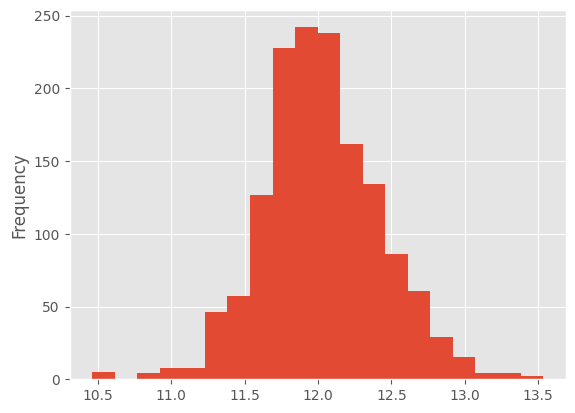

In [ ]:
np.log(train_df['SalePrice']).plot.hist(bins = 20)

-> 가장 많은 값을 중심으로 좌우 대칭에 가까운 분포를 보임

-> 이를 활용한 모델 !

In [ ]:
pd.options.mode.chained_assignment = None # 경고메시지 제어
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [ ]:
# 설명 변수와 목적 변수 지정
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [ ]:
# 모델별 예측 값 저장하기
import warnings
warnings.filterwarnings("ignore")

models = [] # fold별 모델
rmses = [] # fold별 rmse 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값

  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred)) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models.append(model_lgb)
  rmses.append(tmp_rmse)
  oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707
[20]	valid_0's l2: 0.0219638
[30]	valid_0's l2: 0.0178863
[40]	valid_0's l2: 0.0168272
[50]	valid_0's l2: 0.0165421
[60]	valid_0's l2: 0.0164067
[70]	valid_0's l2: 0.0163235
[80]	valid_0's l2: 0.0162611
[90]	valid_0's l2: 0.0162673
[100]	valid_0's l2: 0.0163207
Did not meet early stopping. Best iteration is:
[81]	valid_0's l2: 0.0162538
0.12749050377720023
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to

In [ ]:
sum(rmses) / len(rmses)

0.13274830975285581

-> 앞보다 오차가 낮아짐

# 설명 변수의 전처리 : 결측치 확인

### 각 설명 변수의 결측치 확인

각 설명 변수에 포함된 결측치를 확인해야 함 (단순 입력 실수가 아니라 결측치에 의미가 있다는 점에 주의!!!)

In [ ]:
# all_df 생성
all_df = pd.concat([train_df,test_df], sort = False).reset_index(drop = True)

In [ ]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# 결측치 여부 상위 변수 확인 (상위 35개 이후론 0이기 때문에 상위 40개만)
all_df.isnull().sum().sort_values(ascending = False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

(SalePrice의 결측은 테스트 데이터에는 포함되어있지 않기 때문에 당연히 존재)

.

.

.

PoolQc, MiscFeature, Alley, Fence 등은 상당히 많은 (80% 이상) 결손 존재

& 중요도 높은 Garage 계열의 변수들도 결손 존재

-> 이러한 변수들을 제외할 것인지 추가로 계산하여 보완할 것인지 검토


### 결손이 큰 변수들 처리 (고급 주택 설비 변수 처리)

In [ ]:
# PoolQC 확인
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

-> 10개밖에 존재하지 않음

-> 결과값이 있는 것을 1, 없는 것을 0으로 설정

In [ ]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [ ]:
# 바뀐 PoolQC 확인
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [ ]:
# MiscFeature 확인
all_df.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
# Alley 확인
all_df.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

-> 마찬가지로 둘 다 10% 정도밖에 존재하지 않음

-> 결과값이 있는 것을 1, 없는 것을 0으로 설정

In [ ]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [ ]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [ ]:
# 이해를 돕기 위해 따로 진행하였지만, 아래와 같이 for문 사용 가능
'''
HighFacility_col = ["PoolQC", "MiscFeature", "Alley"]
for col in HighFacility_col :
  if all_df[col].dtype == "object":
    if len(all_df[all_df[col].isnull()])>0 :
      all_df.loc[~all_df["col"].isnull(), "col"] = 1
      all_df.loc[all_df["col"].isnull(), "col"] = 0
'''

'\nHighFacility_col = ["PoolQC", "MiscFeature", "Alley"]\nfor col in HighFacility_col :\n  if all_df[col].dtype == "object":\n    if len(all_df[all_df[col].isnull()])>0 :\n      all_df.loc[~all_df["col"].isnull(), "col"] = 1\n      all_df.loc[all_df["col"].isnull(), "col"] = 0\n'

-> 각 고급 주택 설비와 관련된 변수를 있는지 없는지 여부를 나타내도록 0과 1로 변환함

-> 이들을 모두 더해 고급 설비 개수를 나타내는 수로 정리

In [ ]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int) # int형 데이터타입으로 설정

In [ ]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

-> 고급 설비 개수라는 하나의 데이터로 설정하였기 때문에 이전 데이터 삭제

In [ ]:
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis = 1)

# 이상치 제외

이상치(극단 값) : 통상적인 경향과 다른 값

이상치가 데이터 내에 존재할 경우 과적합 가능성 존재 -> 예측 정확도 떨어짐 -> 학습시 제외하는 것이 좋음

그러나 이상치를 과도하게 판정하고 필요 데이터까지 삭제할 경우 평균적인 데이터밖에 예측할 수 없고, 고급 주택 가격을 예측하는 정확도는 떨어짐

### 비례척도 수치 데이터 추출

In [ ]:
# 각 설명 변수의 데이터 분포 확인 (.T를 사용하여 행과 열의 위치 바꾸기)
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


-> 몇 가지 변수는 거의 0이거나 특정 값 이외에는 취하지 않는 것들이 존재

-> 평균에서 표준편차에 대해 최솟값, 최대값이 크게 벗어나 있는 것 존재

In [ ]:
# 수치 데이터만 추출하기 (np.number 사용)
train_df_num = train_df.select_dtypes(include=[np.number])

In [ ]:
# 비례 척도가 아닌 것
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

In [ ]:
# 수치 데이터 - 비례 척도가 아닌 것 : 비례 척도인 수치 데이터
num_features = sorted(list(set(train_df_num)-set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [ ]:
# train_df_num에서 비례 척도인 num_features만 추출
train_df_num_rs = train_df_num[num_features]

### 다수의 데이터가 0인 변수 확인

In [ ]:
# 다수의 데이터가 0인 변수 확인하기 (75% 이상의 값이 0인 변수)
for col in num_features :
  if train_df_num_rs.describe()[col]["75%"] == 0:
    print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


### 특정 값만을 가지는 변수 확인

In [ ]:
# 특정 값만 가지는 변수 확인하기
for col in num_features :
  if train_df_num_rs[col].nunique()<15:
    print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


### 이상치를 갖는 변수 확인

이상치 : 평균에서 표준편차 +-3배 범위에 들어있지 않은 것


이라 정의하고 찾기 (96%의 데이터는 정규분포에서 +-3배 이내에 들어감)

In [ ]:
for col in num_features :
  tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std()*3)
                              | (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std()*3)]
  print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


-> 해당 몇가지 분포 시각화하기

세로 축 : SalePrice (목적 변수)
가로 축 : 각 변수

**1. BsmtFinSF1**

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

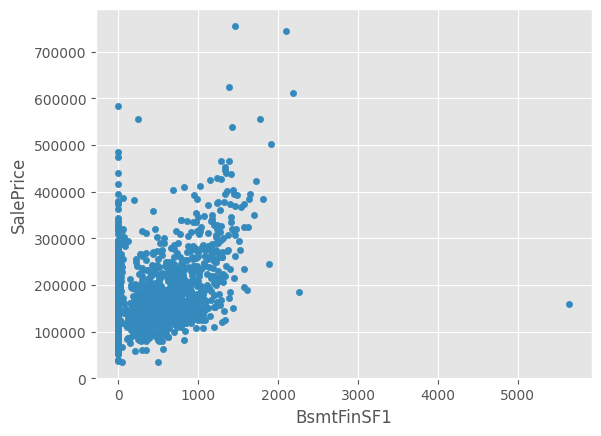

In [ ]:
all_df.plot.scatter(x = "BsmtFinSF1", y = "SalePrice")

-> 0인 것이 존재하지만 대체적으로 BsmtFinSF1이 클수록 SalePrice가 큰 것을 확인할 수 있음

-> 그러나 그렇지 않은 것 존재 (오른쪽 동떨어진 점)

In [ ]:
all_df[all_df["BsmtFinSF1"]>5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


**2. TotalBsmtSF**

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

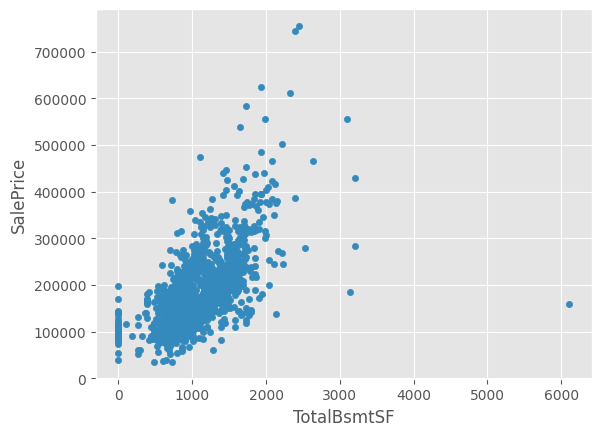

In [ ]:
all_df.plot.scatter(x = "TotalBsmtSF", y = "SalePrice")

In [ ]:
all_df[all_df["TotalBsmtSF"]>6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


**3. GrLivArea**

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

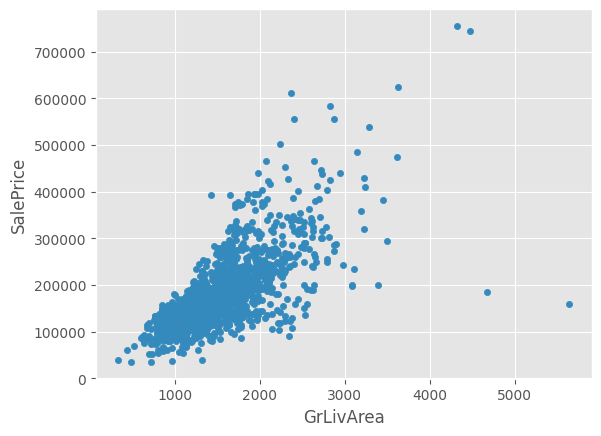

In [ ]:
all_df.plot.scatter(x = "GrLivArea", y = "SalePrice")

In [ ]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


**4. 1stFlrSF**

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

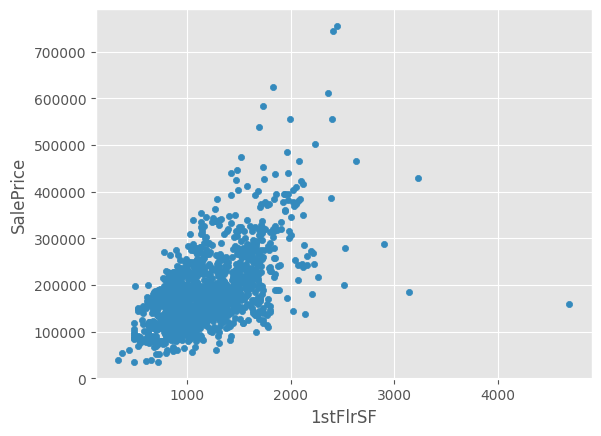

In [ ]:
all_df.plot.scatter(x = "1stFlrSF", y = "SalePrice")

In [ ]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


**5. LotArea**

<Axes: xlabel='LotArea', ylabel='SalePrice'>

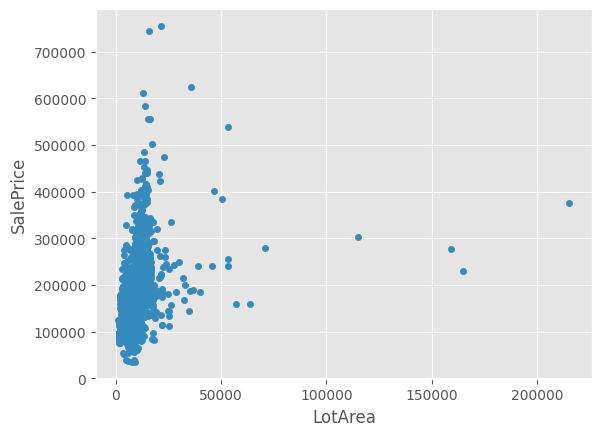

In [ ]:
all_df.plot.scatter(x = "LotArea", y = "SalePrice")

In [ ]:
all_df[all_df["LotArea"] > 15000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
28,29,20,RL,47.0,16321,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,0,12,2006,WD,Normal,207500.0,0
41,42,20,RL,115.0,16905,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,7,2007,WD,Normal,170000.0,0
53,54,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,...,0,0,NaN,0,11,2006,WD,Normal,385000.0,0
66,67,20,RL,NaN,19900,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,7,2010,WD,Normal,180000.0,0
69,70,50,RL,81.0,15593,Pave,Reg,Lvl,AllPub,Corner,...,0,0,NaN,0,7,2006,WD,Normal,225000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,2886,60,RL,78.0,15600,Pave,Reg,Lvl,AllPub,Inside,...,192,0,NaN,0,7,2006,WD,Normal,NaN,0
2896,2897,20,RL,69.0,23580,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,0,9,2006,WD,Normal,NaN,0
2900,2901,20,RL,NaN,50102,Pave,IR1,Low,AllPub,Inside,...,138,0,NaN,0,3,2006,WD,Alloca,NaN,0
2904,2905,20,NaN,125.0,31250,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,0,5,2006,WD,Normal,NaN,0


In [ ]:
# 역치를 마련하고, 이상치 제외!
# 이때, test data는 이상치라 해도 제외하면 안됨
all_df = all_df[(all_df['BsmtFinSF1'] < 2000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF'] < 3000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea'] < 4500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF'] < 2500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea'] < 100000) | (all_df['SalePrice'].isnull())]

### 사전 처리한 학습 데이터로 rmse 계산하기

-> 지금까지 한 것을 토대로 다시한번 rmse 계산하기 !

In [ ]:
# 고급 주택 설비 변수 제외
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [ ]:
# 모든 열의 결측치 값을 missing으로 바꾸기

for cat in categories:
  le = LabelEncoder()
  print(cat)

  all_df[cat].fillna("missing", inplace = True)
  le = le.fit(all_df[cat])
  all_df[cat] = le.transform(all_df[cat])
  all_df[cat] = all_df[cat].astype("category")
  # 단순 숫자로 변환되므로 데이터타입으로 카테고리변수임을 명시

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [ ]:
# 모델별 예측 값 저장
models = [] # fold별 모델
rmses = [] # fold별 rmse 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값

  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred)) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models.append(model_lgb)
  rmses.append(tmp_rmse)
  oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 72
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423077
[20]	valid_0's l2: 0.0220026
[30]	valid_0's l2: 0.0175682
[40]	valid_0's l2: 0.0163798
[50]	valid_0's l2: 0.0162547
[60]	valid_0's l2: 0.0162622
[70]	valid_0's l2: 0.0162514
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161791
0.12719701309461987
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

In [ ]:
sum(rmses)/len(rmses)

0.1298064868429131

-> 더 낮은 오차율을 얻음 !!

# 설명 변수 확인

- 시간 데이터 5개
- 넓이 데이터 16개
- 설비 및 허용 수 데이터 9개
- 품질 및 종류 데이터 50개

### 시간과 관련된 변수의 특징 값 생성

In [ ]:
# 시간과 관련된 변수의 통계량 확인
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [ ]:
# 건축 후 경과 연수
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]
# 수리한 후 경과 연수
all_df["RmdAge"] = all_df["YrSold"]- all_df["YearRemodAdd"]
#차고를 지은 지 몇 년 후에 판매되었는가
all_df["GarageAge"] = all_df["YrSold"] - all_df["GarageYrBlt"]
#건물을 지은 지 몇 년 후에 수리했는가
all_df["RmdTiming"] = all_df["YearRemodAdd"] - all_df["YearBuilt"]

### 넓이와 관련된 변수의 특징 값 생성

In [ ]:
all_df[["LotArea", "MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF","LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LotFrontage"]].describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [ ]:
# 각 층의 전체 넓이
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
# 욕실 수의 합계
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]
# Porch 넓이의 합계
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]
# Porch 여부를 0과 1로 (위의 통계를 통해 Porch가 없는 주택이 많다는 것을 확인할 수 있음 -> Porch 합계를 제거하고 있는지 없는지로 !)
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x:1 if x>0 else 0)
all_df = all_df.drop("Total_PorchSF", axis = 1)

### 생성된 특징 값을 사용한 모델

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [ ]:
# 모델별 예측 값 저장
models = [] # fold별 모델
rmses = [] # fold별 rmse 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값

  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred)) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models.append(model_lgb)
  rmses.append(tmp_rmse)
  oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 79
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0383922
[20]	valid_0's l2: 0.02006
[30]	valid_0's l2: 0.0163766
[40]	valid_0's l2: 0.0156799
[50]	valid_0's l2: 0.015713
[60]	valid_0's l2: 0.0156482
Early stopping, best iteration is:
[44]	valid_0's l2: 0.0156261
0.12500455177694814
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3510
[LightGBM] [I

In [ ]:
sum(rmses)/len(rmses)

0.128011216435866

--> 의미있는 특징값을 추가적으로 생성하여 정확도를 높일 수 있음

# 하이퍼파라미터 최적화

-> 복수의 하이퍼파라미터를 동시에 변경해야 할 때가 있음, 그러나 여러 하이퍼파라미터 값의 조합을 수동으로 일일이 테스트하거나 for문을 사용하여 무차별적으로 대입할 수는 없음

-> 라이브러리 사용 ! - optuna

### Optuna 구현 및 하이퍼파라미터 최적화

optuna 구현 방법
1. 모델의 학습 흐름과 개선하려는 정확도 정의
2. 조정하고자 하는 모델의 하이퍼파라미터 및 탐색 범위 설정
3. 실행 횟수를 정하여 최척화 실행

In [ ]:
# 학습 데이터 및 검증 데이터 작성
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 1234, shuffle = False, stratify = None)

In [ ]:
# 하이퍼파라미터 최적화
# 이때, 사용하는 모델의 사이트에 접속하여 각 하이퍼파라미터의 의미 및 초기값을 참고하는 것이 좋음
def objective(trial) :
  params = {
      "objective" : "regression",
      "random_seed" : 1234,
      "learning_rate" : 0.05,
      "n_estimators" : 1000,
      "num_leaves" : trial.suggest_int("num_leaves", 4, 64),
      "max_bin" : trial.suggest_int("max_bin", 50, 200),
      "bagging_fraction" : trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
      "bagging_freq" : trial.suggest_int("bagging_freq", 1, 10),
      "feature_fraction" : trial.suggest_uniform("feature_fraction", 0.4, 0.9),
      "min_data_in_leaf" : trial.suggest_int("min_data_in_leaf", 2, 16),
      "min_sum_hessian_in_leaf" : trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
  }

  lgb_train = lgb.Dataset(X_train, y_train)
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

  model_lgb = lgb.train(params,
                        lgb_train,
                        valid_sets = lgb_eval,
                        num_boost_round = 100,
                        early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )
  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
  score = np.sqrt(mean_squared_error(y_valid, y_pred))
  return score

In [ ]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials = 50)
study.best_params

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644753
[20]	valid_0's l2: 0.0348094
[30]	valid_0's l2: 0.0236933
[40]	valid_0's l2: 0.0191862
[50]	valid_0's l2: 0.0172279
[60]	valid_0's l2: 0.0165218
[70]	valid_0's l2: 0.0161958


[I 2023-05-30 01:44:32,952] Trial 0 finished with value: 0.12517388877081814 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.12517388877081814.


[80]	valid_0's l2: 0.0159603
[90]	valid_0's l2: 0.0159248
[100]	valid_0's l2: 0.0156756
[110]	valid_0's l2: 0.0157094
[120]	valid_0's l2: 0.015672
Early stopping, best iteration is:
[101]	valid_0's l2: 0.0156685
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.536271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666759
[20]	valid_0's l2: 0.0381348
[30]	valid_0's l2: 0.0260301
[40]	valid_0's l2: 0.020442
[50]	valid_0's l2: 0.0175222
[60]	valid_0's l2: 0.0162761
[70]	valid_0's l2: 0.015785
[80]	valid_0's l2: 0.0155549
[90]	valid_0's l2: 0.0153647


[I 2023-05-30 01:44:36,491] Trial 1 finished with value: 0.12387936527037761 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 1 with value: 0.12387936527037761.


[100]	valid_0's l2: 0.0153977
Early stopping, best iteration is:
[88]	valid_0's l2: 0.0153461
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2208
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655058
[20]	valid_0's l2: 0.0361607
[30]	valid_0's l2: 0.0244021
[40]	valid_0's l2: 0.0194252
[50]	valid_0's l2: 0.0171978


[I 2023-05-30 01:44:36,765] Trial 2 finished with value: 0.1235575496222266 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 2 with value: 0.1235575496222266.


[60]	valid_0's l2: 0.0162004
[70]	valid_0's l2: 0.0154344
[80]	valid_0's l2: 0.0153732
[90]	valid_0's l2: 0.0152704
Early stopping, best iteration is:
[77]	valid_0's l2: 0.0152665
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0697747
[20]	valid_0's l2: 0.0395216
[30]	valid_0's l2: 0.0278034


[I 2023-05-30 01:44:37,053] Trial 3 finished with value: 0.1253453872656015 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 2 with value: 0.1235575496222266.


[40]	valid_0's l2: 0.0220816
[50]	valid_0's l2: 0.0191961
[60]	valid_0's l2: 0.0179125
[70]	valid_0's l2: 0.017225
[80]	valid_0's l2: 0.01646
[90]	valid_0's l2: 0.0164563
[100]	valid_0's l2: 0.0162578
[110]	valid_0's l2: 0.0161442
[120]	valid_0's l2: 0.0160018
[130]	valid_0's l2: 0.0158631
[140]	valid_0's l2: 0.0157616
[150]	valid_0's l2: 0.0157617
[160]	valid_0's l2: 0.0158278
[170]	valid_0's l2: 0.0158378
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0157115
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0657707
[20]	valid_0's l2: 0.0361576
[30]	valid_0's l2: 0.0245604
[40]	valid_0's l2: 0.0198822
[5

[I 2023-05-30 01:44:37,361] Trial 4 finished with value: 0.12718617012420735 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 2 with value: 0.1235575496222266.


[110]	valid_0's l2: 0.016234
Early stopping, best iteration is:
[95]	valid_0's l2: 0.0161763
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2072
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-05-30 01:44:37,680] Trial 5 finished with value: 0.12348449787386455 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 5 with value: 0.12348449787386455.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0166881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2023-05-30 01:44:38,127] Trial 6 finished with value: 0.12425371810417773 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 5 with value: 0.12348449787386455.


[100]	valid_0's l2: 0.0156151
[110]	valid_0's l2: 0.0155902
[120]	valid_0's l2: 0.0155673
[130]	valid_0's l2: 0.0154494
[140]	valid_0's l2: 0.0154662
[150]	valid_0's l2: 0.0154713
Early stopping, best iteration is:
[133]	valid_0's l2: 0.015439
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1830
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653557
[20]	valid_0's l2: 0.0351714
[30]	valid_0's l2: 0.023671
[40]	valid_0's l2: 0.019166
[50]	valid_0's l2: 0.0172404
[60]	valid_0's l2: 0.0162289
[70]	valid_0's l2: 0.0157355
[80]	valid_0's l2: 0.0155908
[90]	valid_0's l2: 0.015533
[100]	valid_0's l2: 0.015387

[I 2023-05-30 01:44:38,591] Trial 7 finished with value: 0.12287795423622262 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 7 with value: 0.12287795423622262.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 82
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0793821
[20]	valid_0's l2: 0.0492331
[30]	valid_0's l2: 0.0349434
[40]	valid_0's l2: 0.0270621
[50]	valid_0's l2: 0.0231438
[60]	valid_0's l2: 0.0209231
[70]	valid_0's l2: 0.0195382
[80]	valid_0's l2: 0.0185204
[90]	valid_0's l2: 0.0178453
[100]	valid_0's l2: 0.0170311
[110]	valid_0's l2: 0.0166845
[120]	valid_0's l2: 0.0163538
[130]	valid_0's l2: 0.0161364
[140]	valid_0's l2: 0.0158169
[150]	valid_0's l2: 0.0155584
[160]	valid_0's l2: 0.0153277
[170]	valid_0's l2: 0.0151952
[180]	valid_0's l2: 0.0151256

[I 2023-05-30 01:44:38,904] Trial 8 finished with value: 0.12111644711850539 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 8 with value: 0.12111644711850539.


[250]	valid_0's l2: 0.0147259
[260]	valid_0's l2: 0.0146984
[270]	valid_0's l2: 0.0146996
[280]	valid_0's l2: 0.0146849
Early stopping, best iteration is:
[266]	valid_0's l2: 0.0146692
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2933
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0687215
[20]	valid_0's l2: 0.0390629
[30]	valid_0's l2: 0.0263958
[40]	valid_0's l2: 0.0209882
[50]	valid_0's l2: 0.0182452
[60]	valid_0's l2: 0.0166641
[70]	valid_0's l2: 0.015538


[I 2023-05-30 01:44:39,156] Trial 9 finished with value: 0.11923599026021169 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 9 with value: 0.11923599026021169.


[80]	valid_0's l2: 0.0147216
[90]	valid_0's l2: 0.0146346
[100]	valid_0's l2: 0.0145061
[110]	valid_0's l2: 0.0144558
[120]	valid_0's l2: 0.0142495
[130]	valid_0's l2: 0.0142769
Early stopping, best iteration is:
[118]	valid_0's l2: 0.0142172
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2341
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0727401
[20]	valid_0's l2: 0.0438483
[30]	valid_0's l2: 0.0299436
[40]	valid_0's l2: 0.0236668


[I 2023-05-30 01:44:39,439] Trial 10 finished with value: 0.12436235926655956 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5044383780474173, 'bagging_freq': 4, 'feature_fraction': 0.8976497838389439, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 9 with value: 0.11923599026021169.


[50]	valid_0's l2: 0.0203443
[60]	valid_0's l2: 0.0185822
[70]	valid_0's l2: 0.0175803
[80]	valid_0's l2: 0.0167543
[90]	valid_0's l2: 0.0164828
[100]	valid_0's l2: 0.0162282
[110]	valid_0's l2: 0.0161766
[120]	valid_0's l2: 0.0160708
[130]	valid_0's l2: 0.0159199
[140]	valid_0's l2: 0.0157389
[150]	valid_0's l2: 0.0156558
[160]	valid_0's l2: 0.0155105
[170]	valid_0's l2: 0.0155022
[180]	valid_0's l2: 0.0155657
[190]	valid_0's l2: 0.0155172
[200]	valid_0's l2: 0.0155906
[210]	valid_0's l2: 0.0155206
Early stopping, best iteration is:
[192]	valid_0's l2: 0.015466
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3304
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validat

[I 2023-05-30 01:44:39,808] Trial 11 finished with value: 0.11886933763470856 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11886933763470856.


[130]	valid_0's l2: 0.0143997
[140]	valid_0's l2: 0.0144343
[150]	valid_0's l2: 0.0143003
[160]	valid_0's l2: 0.0142562
[170]	valid_0's l2: 0.0141811
[180]	valid_0's l2: 0.0141539
[190]	valid_0's l2: 0.0141947
Early stopping, best iteration is:
[177]	valid_0's l2: 0.0141299
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2363
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0657395
[20]	valid_0's l2: 0.0353328
[30]	valid_0's l2: 0.0233502
[40]	valid_0's l2: 0.0188745
[50]	valid_0's l2: 0.0170763
[60]	valid_0's l2: 0.016352
[70]	valid_0's l2: 0.0161931
[80]	valid_0's l2: 0.0159207
[90]	valid_0's l2: 0.015

[I 2023-05-30 01:44:40,336] Trial 12 finished with value: 0.12463036041353912 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11886933763470856.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2023-05-30 01:44:40,629] Trial 13 finished with value: 0.12307210430663046 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11886933763470856.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0152208
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0151467
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the 

[I 2023-05-30 01:44:41,034] Trial 14 finished with value: 0.122374114564119 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feature_fraction': 0.6208554606244228, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11886933763470856.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3257
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0629687
[20]	valid_0's l2: 0.034067
[30]	valid_0's l2: 0.023275
[40]	valid_0's l2: 0.0188748
[50]	valid_0's l2: 0.0170138
[60]	valid_0's l2: 0.0163254
[70]	valid_0's l2: 0.0161193
[80]	valid_0's l2: 0.0160799
[90]	valid_0's l2: 0.0161027
[100]	valid_0's l2: 0.0160752
Early stopping, best iteration is:
[84]	valid_0's l2: 0.0160224


[I 2023-05-30 01:44:41,560] Trial 15 finished with value: 0.12657944291830167 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 11 with value: 0.11886933763470856.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0661973
[20]	valid_0's l2: 0.0364516
[30]	valid_0's l2: 0.0251883
[40]	valid_0's l2: 0.0207616
[50]	valid_0's l2: 0.0186431
[60]	valid_0's l2: 0.0169723
[70]	valid_0's l2: 0.0162791
[80]	valid_0's l2: 0.0158967
[90]	valid_0's l2: 0.0157657
[100]	valid_0's l2: 0.0159131
[110]	valid_0's l2: 0.0157737
[120]	valid_0's l2: 0.015947
Early stopping, best iteration is:
[109]	valid_0's l2: 0.0157217


[I 2023-05-30 01:44:42,049] Trial 16 finished with value: 0.12538613989752978 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11886933763470856.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2991
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.064633
[20]	valid_0's l2: 0.0349832
[30]	valid_0's l2: 0.0237535
[40]	valid_0's l2: 0.0195361
[50]	valid_0's l2: 0.0177582
[60]	valid_0's l2: 0.0169031
[70]	valid_0's l2: 0.0166461


[I 2023-05-30 01:44:42,463] Trial 17 finished with value: 0.12734100939769272 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11886933763470856.


[80]	valid_0's l2: 0.0163204
[90]	valid_0's l2: 0.0162721
[100]	valid_0's l2: 0.0162939
[110]	valid_0's l2: 0.0162881
[120]	valid_0's l2: 0.0162811
Early stopping, best iteration is:
[103]	valid_0's l2: 0.0162157
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1864
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659405
[20]	valid_0's l2: 0.0366923
[30]	valid_0's l2: 0.0244066
[40]	valid_0's l2: 0.0193676
[50]	valid_0's l2: 0.0171161
[60]	valid_0's l2: 0.0159874
[70]	valid_0's l2: 0.0154313
[80]	valid_0's l2: 0.0149525
[90]	valid_0's l2: 0.0149166
[100]	valid_0's l2: 0.0150487
[110]	valid_0's l2: 0.0148

[I 2023-05-30 01:44:42,815] Trial 18 finished with value: 0.12064044737329646 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 11 with value: 0.11886933763470856.


[130]	valid_0's l2: 0.0145768
[140]	valid_0's l2: 0.0146205
[150]	valid_0's l2: 0.0146524
Early stopping, best iteration is:
[132]	valid_0's l2: 0.0145541
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1552
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0768323
[20]	valid_0's l2: 0.0463817
[30]	valid_0's l2: 0.0320458
[40]	valid_0's l2: 0.0251137
[50]	valid_0's l2: 0.02141
[60]	valid_0's l2: 0.01938
[70]	valid_0's l2: 0.0178531


[I 2023-05-30 01:44:43,071] Trial 19 finished with value: 0.11857149625083792 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11857149625083792.


[80]	valid_0's l2: 0.0167931
[90]	valid_0's l2: 0.0161369
[100]	valid_0's l2: 0.0156711
[110]	valid_0's l2: 0.015408
[120]	valid_0's l2: 0.015114
[130]	valid_0's l2: 0.0147979
[140]	valid_0's l2: 0.0145899
[150]	valid_0's l2: 0.0144711
[160]	valid_0's l2: 0.0143088
[170]	valid_0's l2: 0.0141975
[180]	valid_0's l2: 0.0140904
[190]	valid_0's l2: 0.0140794
[200]	valid_0's l2: 0.0140756
Early stopping, best iteration is:
[188]	valid_0's l2: 0.0140592
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2551
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0667033
[20]	valid_0's l2: 0.0369512
[30]	valid_0's l2: 0.

[I 2023-05-30 01:44:43,461] Trial 20 finished with value: 0.11885059473922911 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11857149625083792.


[140]	valid_0's l2: 0.0141425
[150]	valid_0's l2: 0.0141329
[160]	valid_0's l2: 0.0141542
Early stopping, best iteration is:
[141]	valid_0's l2: 0.0141255
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3173
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0688465
[20]	valid_0's l2: 0.0398371
[30]	valid_0's l2: 0.0265716
[40]	valid_0's l2: 0.0207609
[50]	valid_0's l2: 0.0179811


[I 2023-05-30 01:44:43,744] Trial 21 finished with value: 0.11840310362416424 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 21 with value: 0.11840310362416424.


[60]	valid_0's l2: 0.0164042
[70]	valid_0's l2: 0.0154028
[80]	valid_0's l2: 0.0149458
[90]	valid_0's l2: 0.0144803
[100]	valid_0's l2: 0.0143512
[110]	valid_0's l2: 0.0142082
[120]	valid_0's l2: 0.0140731
[130]	valid_0's l2: 0.0141627
Early stopping, best iteration is:
[117]	valid_0's l2: 0.0140193
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[I 2023-05-30 01:44:44,151] Trial 22 finished with value: 0.12176800952994939 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 21 with value: 0.11840310362416424.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0151555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-05-30 01:44:44,517] Trial 23 finished with value: 0.12281183195479659 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 21 with value: 0.11840310362416424.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0152298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's l2: 0.0150966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l2: 0.0152535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[118]	valid_0's l2: 0.0150827
[LightGBM] [Warning

[I 2023-05-30 01:44:45,041] Trial 24 finished with value: 0.12039060141810584 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2861
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-05-30 01:44:45,619] Trial 25 finished with value: 0.12207685004086737 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l2: 0.0149664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2023-05-30 01:44:45,837] Trial 26 finished with value: 0.12083877662722149 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 21 with value: 0.11840310362416424.


[40]	valid_0's l2: 0.0239133
[50]	valid_0's l2: 0.0203606
[60]	valid_0's l2: 0.0186547
[70]	valid_0's l2: 0.0171801
[80]	valid_0's l2: 0.0163128
[90]	valid_0's l2: 0.0155631
[100]	valid_0's l2: 0.0154335
[110]	valid_0's l2: 0.0150776
[120]	valid_0's l2: 0.0150323
[130]	valid_0's l2: 0.0148374
[140]	valid_0's l2: 0.014727
[150]	valid_0's l2: 0.014602
[160]	valid_0's l2: 0.0147589
[170]	valid_0's l2: 0.0147859
Early stopping, best iteration is:
[150]	valid_0's l2: 0.014602
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2274
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2023-05-30 01:44:46,114] Trial 27 finished with value: 0.12113871737855433 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 21 with value: 0.11840310362416424.


[10]	valid_0's l2: 0.0672835
[20]	valid_0's l2: 0.0374975
[30]	valid_0's l2: 0.0252525
[40]	valid_0's l2: 0.0197844
[50]	valid_0's l2: 0.01709
[60]	valid_0's l2: 0.0158997
[70]	valid_0's l2: 0.0153653
[80]	valid_0's l2: 0.0150553
[90]	valid_0's l2: 0.0147797
[100]	valid_0's l2: 0.0148052
[110]	valid_0's l2: 0.014728
[120]	valid_0's l2: 0.0147817
Early stopping, best iteration is:
[105]	valid_0's l2: 0.0146746
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.067732
[20]	valid_0's l2: 0.0370507
[30]	valid_0's l2: 0.0241412
[40]	valid_0's l2: 0.0191342
[5

[I 2023-05-30 01:44:46,512] Trial 28 finished with value: 0.12078433515566875 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 21 with value: 0.11840310362416424.


[130]	valid_0's l2: 0.014672
[140]	valid_0's l2: 0.0146529
[150]	valid_0's l2: 0.0146172
[160]	valid_0's l2: 0.0147558
[170]	valid_0's l2: 0.0147677
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0145889
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-05-30 01:44:50,415] Trial 29 finished with value: 0.12340124004272097 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's l2: 0.015282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l2: 0.0153038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[146]	valid_0's l2: 0.0152279
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3266
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until va

[I 2023-05-30 01:44:50,898] Trial 30 finished with value: 0.12544937491922217 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2488
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 82
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0642825
[20]	valid_0's l2: 0.034847
[30]	valid_0's l2: 0.0235141
[40]	valid_0's l2: 0.0193864
[50]	valid_0's l2: 0.0177025
[60]	valid_0's l2: 0.0169188
[70]	valid_0's l2: 0.0166335


[I 2023-05-30 01:44:51,239] Trial 31 finished with value: 0.12875321501185985 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 21 with value: 0.11840310362416424.


[80]	valid_0's l2: 0.0166678
[90]	valid_0's l2: 0.0166718
Early stopping, best iteration is:
[74]	valid_0's l2: 0.0165774
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0672339
[20]	valid_0's l2: 0.0361544
[30]	valid_0's l2: 0.0242846
[40]	valid_0's l2: 0.019336
[50]	valid_0's l2: 0.0172467
[60]	valid_0's l2: 0.0160592
[70]	valid_0's l2: 0.0158741
[80]	valid_0's l2: 0.0153976
[90]	valid_0's l2: 0.0154111
[100]	valid_0's l2: 0.0152404
[110]	valid_0's l2: 0.0151651
[120]	valid_0's l2: 0.0150613
[130]	valid_0's l2: 0.0149121
[140]	valid_0's l2: 0.014809

[I 2023-05-30 01:44:51,634] Trial 32 finished with value: 0.1213951245743172 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 21 with value: 0.11840310362416424.


Early stopping, best iteration is:
[146]	valid_0's l2: 0.0147368
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3247
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0713596
[20]	valid_0's l2: 0.0405558
[30]	valid_0's l2: 0.0271427
[40]	valid_0's l2: 0.0213722
[50]	valid_0's l2: 0.0183568
[60]	valid_0's l2: 0.0169121
[70]	valid_0's l2: 0.0163489
[80]	valid_0's l2: 0.0159285
[90]	valid_0's l2: 0.0155932

[I 2023-05-30 01:44:51,912] Trial 33 finished with value: 0.12061082679772786 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 21 with value: 0.11840310362416424.



[100]	valid_0's l2: 0.0152286
[110]	valid_0's l2: 0.0149742
[120]	valid_0's l2: 0.0148172
[130]	valid_0's l2: 0.0147366
[140]	valid_0's l2: 0.0145681
[150]	valid_0's l2: 0.0145645
Early stopping, best iteration is:
[139]	valid_0's l2: 0.014547
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2023-05-30 01:44:52,357] Trial 34 finished with value: 0.12130897766607146 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's l2: 0.0148981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2023-05-30 01:44:52,883] Trial 35 finished with value: 0.11906075554296357 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2290
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0688484
[20]	valid_0's l2: 0.039294
[30]	valid_0's l2: 0.026703
[40]	valid_0's l2: 0.0210992
[50]	valid_0's l2: 0.0186548
[60]	valid_0's l2: 0.0171041
[70]	valid_0's l2: 0.0165172
[80]	valid_0's l2: 0.0160873
[90]	valid_0's l2: 0.0157609
[100]	valid_0's l2: 0.0155601
[110]	valid_0's l2: 0.0153701
[120]	valid_0's l2: 0.0152564


[I 2023-05-30 01:44:53,196] Trial 36 finished with value: 0.12341025335262289 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 21 with value: 0.11840310362416424.


[130]	valid_0's l2: 0.0153213
[140]	valid_0's l2: 0.0152853
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0152301
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3360
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[I 2023-05-30 01:44:53,742] Trial 37 finished with value: 0.124003618878397 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0154699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's l2: 0.0154867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2023-05-30 01:44:54,144] Trial 38 finished with value: 0.12460871731890212 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 21 with value: 0.11840310362416424.


[90]	valid_0's l2: 0.0160292
[100]	valid_0's l2: 0.0157553
[110]	valid_0's l2: 0.0155901
[120]	valid_0's l2: 0.015707
Early stopping, best iteration is:
[108]	valid_0's l2: 0.0155273
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2627
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0657512
[20]	valid_0's l2: 0.0359479
[30]	valid_0's l2: 0.0239412
[40]	valid_0's l2: 0.0190717
[50]	valid_0's l2: 0.0174476
[60]	valid_0's l2: 0.016642
[70]	valid_0's l2: 0.0161124
[80]	valid_0's l2: 0.0157323
[90]	valid_0's l2: 0.0155124
[100]	valid_0's l2: 0.0153474


[I 2023-05-30 01:44:54,543] Trial 39 finished with value: 0.12353809573898923 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 21 with value: 0.11840310362416424.


[110]	valid_0's l2: 0.0153492
[120]	valid_0's l2: 0.0152918
[130]	valid_0's l2: 0.0153252
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0152617
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0673591
[20]	valid_0's l2: 0.0375035
[30]	valid_0's l2: 0.0255288


[I 2023-05-30 01:44:54,812] Trial 40 finished with value: 0.12128196255015175 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 21 with value: 0.11840310362416424.


[40]	valid_0's l2: 0.0196794
[50]	valid_0's l2: 0.0168057
[60]	valid_0's l2: 0.015717
[70]	valid_0's l2: 0.0150343
[80]	valid_0's l2: 0.0148983
[90]	valid_0's l2: 0.0149578
[100]	valid_0's l2: 0.0147779
[110]	valid_0's l2: 0.0147236
[120]	valid_0's l2: 0.0147377
[130]	valid_0's l2: 0.014986
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0147093
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2837
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0713674
[20]	valid_0's l2: 0.0423609
[30]	valid_0's l2: 0.0282027
[40]	valid_0's l2: 0.0219167
[50]	valid_0's l2: 0.0187074
[60]	valid_0's l2: 0.0170787

[I 2023-05-30 01:44:55,130] Trial 41 finished with value: 0.11888494491660621 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 83
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0660866
[20]	valid_0's l2: 0.0369952
[30]	valid_0's l2: 0.0260315
[40]	valid_0's l2: 0.02104
[50]	valid_0's l2: 0.0189384
[60]	valid_0's l2: 0.0182546
[70]	valid_0's l2: 0.0178921
[80]	valid_0's l2: 0.0175843
[90]	valid_0's l2: 0.0174329
[100]	valid_0's l2: 0.0172486
[110]	valid_0's l2: 0.0171496


[I 2023-05-30 01:44:55,490] Trial 42 finished with value: 0.13011685970541695 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 21 with value: 0.11840310362416424.


[120]	valid_0's l2: 0.0170523
[130]	valid_0's l2: 0.0170285
[140]	valid_0's l2: 0.0169773
[150]	valid_0's l2: 0.016968
[160]	valid_0's l2: 0.0170109
Early stopping, best iteration is:
[143]	valid_0's l2: 0.0169304
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2090
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 82
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0649792
[20]	valid_0's l2: 0.0357673
[30]	valid_0's l2: 0.0240416
[40]	valid_0's l2: 0.019074
[50]	valid_0's l2: 0.017177
[60]	valid_0's l2: 0.0163421
[70]	valid_0's l2: 0.0157738
[80]	valid_0's l2: 0.0156674
[90]	valid_0's l2: 0.015438
[100]	valid_0's l2: 0.0154277
[110]	valid_0's l2: 0.015293

[I 2023-05-30 01:44:55,852] Trial 43 finished with value: 0.12298236092014987 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 21 with value: 0.11840310362416424.


Early stopping, best iteration is:
[134]	valid_0's l2: 0.0151247
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3183
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0667967
[20]	valid_0's l2: 0.0371191
[30]	valid_0's l2: 0.0249259
[40]	valid_0's l2: 0.0199581
[50]	valid_0's l2: 0.0173649
[60]	valid_0's l2: 0.0157243
[70]	valid_0's l2: 0.0153144
[80]	valid_0's l2: 0.0150273
[90]	valid_0's l2: 0.0151666
[100]	valid_0's l2: 0.0149961
[110]	valid_0's l2: 0.0148021
[120]	valid_0's l2: 0.0148316
[130]	valid_0's l2: 0.014735
[140]	valid_0's l2: 0.0145927
[150]	valid_0's l2: 0.0147953
[160]	valid_0's l2: 0.014

[I 2023-05-30 01:44:56,249] Trial 44 finished with value: 0.12080023470638986 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.071106
[20]	valid_0's l2: 0.0405127
[30]	valid_0's l2: 0.0270753
[40]	valid_0's l2: 0.0216281
[50]	valid_0's l2: 0.0187758
[60]	valid_0's l2: 0.0171305
[70]	valid_0's l2: 0.0163396
[80]	valid_0's l2: 0.0156264
[90]	valid_0's l2: 0.015222
[100]	valid_0's l2: 0.014911
[110]	valid_0's l2: 0.0147521
[120]	valid_0's l2: 0.0146561
[130]	valid_0's l2: 0.0145383
[140]	valid_0's l2: 0.0145923
[150]	valid_0's l2: 0.0144642


[I 2023-05-30 01:44:56,606] Trial 45 finished with value: 0.11883354291458315 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 21 with value: 0.11840310362416424.


[160]	valid_0's l2: 0.0143137
[170]	valid_0's l2: 0.0142867
[180]	valid_0's l2: 0.0141961
[190]	valid_0's l2: 0.014157
[200]	valid_0's l2: 0.0141483
[210]	valid_0's l2: 0.0141601
Early stopping, best iteration is:
[192]	valid_0's l2: 0.0141214
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659333
[20]	valid_0's l2: 0.0351652
[30]	valid_0's l2: 0.0231969
[40]	valid_0's l2: 0.0186994
[50]	valid_0's l2: 0.0168422
[60]	valid_0's l2: 0.0158994
[70]	valid_0's l2: 0.0155835
[80]	valid_0's l2: 0.0152504
[90]	valid_0's l2: 0.0152378
[100]	valid_0's l2: 0.015

[I 2023-05-30 01:44:57,221] Trial 46 finished with value: 0.12194965009372752 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1847
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0640342
[20]	valid_0's l2: 0.0342978
[30]	valid_0's l2: 0.023297
[40]	valid_0's l2: 0.0187792
[50]	valid_0's l2: 0.0172781
[60]	valid_0's l2: 0.0167583
[70]	valid_0's l2: 0.016514
[80]	valid_0's l2: 0.0162098
[90]	valid_0's l2: 0.0161336
[100]	valid_0's l2: 0.016115
[110]	valid_0's l2: 0.0161153
[120]	valid_0's l2: 0.0161187
[130]	valid_0's l2: 0.0161699


[I 2023-05-30 01:44:57,748] Trial 47 finished with value: 0.12684744943241114 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 21 with value: 0.11840310362416424.


Early stopping, best iteration is:
[112]	valid_0's l2: 0.0160903
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0672899
[20]	valid_0's l2: 0.0371117
[30]	valid_0's l2: 0.0245855
[40]	valid_0's l2: 0.0195173
[50]	valid_0's l2: 0.0170797
[60]	valid_0's l2: 0.0160598
[70]	valid_0's l2: 0.0157721
[80]	valid_0's l2: 0.0152641
[90]	valid_0's l2: 0.0152491
[100]	valid_0's l2: 0.015003
[110]	valid_0's l2: 0.0149801
[120]	valid_0's l2: 0.0149079
[130]	valid_0's l2: 0.0148531
[140]	valid_0's l2: 0.0146944
[150]	valid_0's l2: 0.0146963
[160]	valid_0's l2: 0.014

[I 2023-05-30 01:44:58,136] Trial 48 finished with value: 0.12103922972566261 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2023-05-30 01:44:58,486] Trial 49 finished with value: 0.12194996813749603 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 21 with value: 0.11840310362416424.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's l2: 0.0151373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l2: 0.0149685
[LightGBM] [Warning] No further splits w

{'num_leaves': 17,
 'max_bin': 171,
 'bagging_fraction': 0.5982528704234924,
 'bagging_freq': 9,
 'feature_fraction': 0.5248981378274891,
 'min_data_in_leaf': 15,
 'min_sum_hessian_in_leaf': 6}

In [ ]:
lgbm_params = {
      "objective" : "regression",
      "random_seed" : 1234,
      "learning_rate" : 0.05,
      "n_estimators" : 1000,
      "num_leaves": 17,
      "max_bin": 171,
      "bagging_fraction": 0.5982528704234924,
      "bagging_freq": 9,
      "feature_fraction": 0.5248981378274891,
      "min_data_in_leaf": 15,
      "min_sum_hessian_in_leaf": 6
  }

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [ ]:
# 모델별 예측 값 저장
models = [] # fold별 모델
rmses = [] # fold별 rmse 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값

  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred)) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models.append(model_lgb)
  rmses.append(tmp_rmse)
  oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2971
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 80
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0762255
[20]	valid_0's l2: 0.0411157
[30]	valid_0's l2: 0.0266979
[40]	valid_0's l2: 0.0207191
[50]	valid_0's l2: 0.0175401
[60]	valid_0's l2: 0.0158048
[70]	valid_0's l2: 0.0149464
[80]	valid_0's l2: 0.0144046
[90]	valid_0's l2: 0.014157
[100]	valid_0's l2: 0.0139382
[110]	valid_0's l2: 0.0138878
[120]	valid_0's l2: 0.0138206
[130]	valid_0's l2: 0.0137182
[140]	valid_0's l2: 0.0135441
[150]	valid_0's l2: 0.0134981
[160]	valid_0's l2: 0.0135426
Early stopping, best iteration is:
[148]	valid_0's l2: 0.0134

In [ ]:
sum(rmses)/len(rmses)

0.1225727358772648

### 캐글에 제출

In [ ]:
# 테스트 데이터 준비
test_X = test_df_le.drop(["SalePrice", "Id"], axis = 1)

In [ ]:
# 학습 모델을 사용하여 테스트 데이터의 목적 변수 예측하기
preds = []

for model in models :
  pred = model.predict(test_X)
  preds.append(pred)

In [ ]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [ ]:
# 예측 값을 원래 스케일로 되돌리기
preds_exp = np.exp(preds_mean)
len(preds_exp)

1459

In [ ]:
# 예측값을 사용하여 submission 파일 작성하기
submission["SalePrice"] = preds_exp

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)

# 여러 가지 머신 러닝 방법을 이용한 앙상블

### 랜덤 포레스트로 학습

랜덤 포레스트 : LightGBM과 달리 결측치를 그대로 취급할 수 없음 -> 대체 필요

현재 결측치가 존재하는 MasVnrArea같은 변수는 반 이상의 데이터 값이 0이라는 점과 중앙값이 이상치 영향을 쉽게 받지 않는다는 점을 생각하여 중앙값으로 변경

(LotFrontage - 결측치가 많기 때문에 변수 자체를 삭제)

In [ ]:
# 결측치를 포함한 변수 확인하기
hasnan_cat = []

for col in all_df.columns :
  tmp_null_count = all_df[col].isnull().sum()
  if(tmp_null_count>0)& (col!="SalePrice"):
    print(col, tmp_null_count)
    hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
GarageAge 159
TotalSF 1
Total_Bathrooms 2


In [ ]:
# 결측치를 포함한 변수들의 통계량 확인하기
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,GarageAge,TotalSF,Total_Bathrooms
count,2425.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2902.000000,2902.000000,2745.000000,2903.000000,2903.000000,2745.000000,2903.000000,2902.000000
mean,69.071340,101.191187,434.926628,49.016879,559.850499,1043.794006,0.426258,0.061337,1978.061202,1.763348,471.632794,29.727505,2533.060971,2.431771
std,22.662001,177.804595,440.128728,168.444473,438.438879,420.008348,0.522410,0.245667,25.600996,0.761410,214.551791,25.641920,764.699033,0.937184
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,-200.000000,334.000000,1.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,791.500000,0.000000,0.000000,1960.000000,1.000000,319.500000,6.000000,1998.500000,2.000000
50%,68.000000,0.000000,365.000000,0.000000,467.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,478.000000,29.000000,2444.000000,2.000000
75%,80.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,48.000000,2985.000000,3.000000
max,313.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,114.000000,10190.000000,8.000000


In [ ]:
# 결측치를 각 변수의 중앙값으로 보완하기
for col in all_df.columns:
  tmp_null_count = all_df[col].isnull().sum()
  if (tmp_null_count>0) & (col != "SalePrice"):
    print(col, tmp_null_count)
    all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
GarageAge 159
TotalSF 1
Total_Bathrooms 2


In [ ]:
# 랜덤 포레스트를 이용하여 학습 및 예측하기
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis = 1)
train_Y = train_df_le["SalePrice_log"]

In [ ]:
fold = 3
kf = KFold(n_splits = folds)

In [ ]:
# 모델별 예측 값 저장
models_rf = [] # fold별 모델
rmses_rf = [] # fold별 rmse 결과값
oof_rf = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  model_rf = rf(
      n_estimators = 50,
      random_state = 1234
  )

  model_rf.fit(X_train, y_train)
  y_pred = model_rf.predict(X_valid)

  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred)) # 정확도 계산
  print(tmp_rmse) # 평균제곱오차 출력

  models_rf.append(model_rf)
  rmses_rf.append(tmp_rmse)
  oof_rf[val_index] = y_pred

0.13894990640695967
0.14195978368823237
0.13066197107644453


In [ ]:
sum(rmses_rf)/len(rmses_rf)

0.13719055372387887

In [ ]:
# 테스트 데이터 준비
test_X = test_df_le.drop(["SalePrice", "Id"], axis = 1)

In [ ]:
# 학습 모델을 사용하여 테스트 데이터의 목적 변수 예측하기
preds_rf = []

for model in models_rf :
  pred = model.predict(test_X)
  preds_rf.append(pred)

In [ ]:
preds_array_rf = np.array(preds_rf)
preds_mean_rf = np.mean(preds_array_rf, axis = 0)

In [ ]:
# 예측 값을 원래 스케일로 되돌리기
preds_exp_rf = np.exp(preds_mean_rf)

In [ ]:
# 예측값을 사용하여 submission 파일 작성하기
submission["SalePrice"] = preds_exp_rf

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)

### XGBoost로 학습


XGBoost - 카테고리 변수를 읽어올 수 없으므로 int형으로 변환해주어야 함

In [ ]:
categories = train_X.columns[train_X.dtypes=="category"]

In [ ]:
for col in categories:
  train_X[col] = train_X[col].astype("int8")
  test_X[col] = test_X[col].astype("int8")

XGBoost도 Optuna를 활용하여 하이퍼파라미터 조정해보기

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 1234, shuffle = False, stratify = None)

In [ ]:
def objective(trial) :
  xgb_params = {
      "learning_rate" : 0.05,
      "seed" : 1234,
      "max_depth" : trial.suggest_int("max_depth", 3, 16),
      "colsample_bytree" : trial.suggest_uniform("colsample_bytree", 0.2, 0.9),
      "sublsample" : trial.suggest_uniform("sublsample", 0.2, 0.9),
  }

  xgb_train = xgb.DMatrix(X_train, label = y_train)
  xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
  evals = [(xgb_train, "train"), (xgb_eval, "eval")]

  model_xgb = xgb.train(xgb_params,
                        xgb_train,
                        evals = evals,
                        num_boost_round = 1000, early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )
  y_pred = model_xgb.predict(xgb_eval)
  score = np.sqrt(mean_squared_error(y_valid, y_pred))
  return score

In [ ]:
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials = 50)
study.best_params

[01:45:04] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42705	eval-rmse:1.42744
[50]	train-rmse:0.86422	eval-rmse:0.86694
[60]	train-rmse:0.52815	eval-rmse:0.53527
[70]	train-rmse:0.32743	eval-rmse:0.34283
[80]	train-rmse:0.20711	eval-rmse:0.23509
[90]	train-rmse:0.13366	eval-rmse:0.17926
[100]	train-rmse:0.08794	eval-rmse:0.15104
[110]	train-rmse:0.05897	eval-rmse:0.13837
[120]	train-

[I 2023-05-30 01:45:07,554] Trial 0 finished with value: 0.1268563992937272 and parameters: {'max_depth': 15, 'colsample_bytree': 0.6149912327575129, 'sublsample': 0.7909860240067121}. Best is trial 0 with value: 0.1268563992937272.


[01:45:07] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93966	eval-rmse:3.94490
[30]	train-rmse:2.36816	eval-rmse:2.37039
[40]	train-rmse:1.42728	eval-rmse:1.42830
[50]	train-rmse:0.86450	eval-rmse:0.86749
[60]	train-rmse:0.52824	eval-rmse:0.53570
[70]	train-rmse:0.32743	eval-rmse:0.34267
[80]	train-rmse:0.20707	eval-rmse:0.23402
[90]	train-rmse:0.13392	eval-rmse:0.17778
[100]	train-rmse:0.08833	eval-rmse:0.15009
[110]	train-rmse:0.05932	eval-rmse:0.13668
[120]	train-

[I 2023-05-30 01:45:09,722] Trial 1 finished with value: 0.12493418683510732 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5814182280978277, 'sublsample': 0.49655835953723326}. Best is trial 1 with value: 0.12493418683510732.


[01:45:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93974	eval-rmse:3.94472
[30]	train-rmse:2.36840	eval-rmse:2.36981
[40]	train-rmse:1.42727	eval-rmse:1.42777
[50]	train-rmse:0.86457	eval-rmse:0.86650
[60]	train-rmse:0.52831	eval-rmse:0.53325
[70]	train-rmse:0.32792	eval-rmse:0.33938
[80]	train-rmse:0.20876	eval-rmse:0.23057
[90]	train-rmse:0.13789	eval-rmse:0.17224
[100]	train-rmse:0.09568	eval-rmse:0.14374
[110]	train-rmse:0.07080	eval-rmse:0.13017
[120]	train-

[I 2023-05-30 01:45:10,690] Trial 2 finished with value: 0.11766803792930042 and parameters: {'max_depth': 8, 'colsample_bytree': 0.46906719510488987, 'sublsample': 0.4082742245811306}. Best is trial 2 with value: 0.11766803792930042.


[01:45:10] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94364
[30]	train-rmse:2.36778	eval-rmse:2.36976
[40]	train-rmse:1.42670	eval-rmse:1.42881
[50]	train-rmse:0.86371	eval-rmse:0.86909
[60]	train-rmse:0.52736	eval-rmse:0.53727
[70]	train-rmse:0.32635	eval-rmse:0.34502
[80]	train-rmse:0.20583	eval-rmse:0.23748
[90]	train-rmse:0.13295	eval-rmse:0.18059
[100]	train-rmse:0.08847	eval-rmse:0.15259
[110]	train-rmse:0.06091	eval-rmse:0.13966
[120]	train-

[I 2023-05-30 01:45:12,991] Trial 3 finished with value: 0.12889020057247155 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8745639323507204, 'sublsample': 0.46840906317804437}. Best is trial 2 with value: 0.11766803792930042.


[01:45:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36779	eval-rmse:2.36982
[40]	train-rmse:1.42676	eval-rmse:1.42852
[50]	train-rmse:0.86383	eval-rmse:0.86808
[60]	train-rmse:0.52748	eval-rmse:0.53588
[70]	train-rmse:0.32650	eval-rmse:0.34416
[80]	train-rmse:0.20625	eval-rmse:0.23573
[90]	train-rmse:0.13431	eval-rmse:0.17888
[100]	train-rmse:0.09126	eval-rmse:0.15195
[110]	train-rmse:0.06491	eval-rmse:0.14025
[120]	train-

[I 2023-05-30 01:45:14,293] Trial 4 finished with value: 0.12922221884351331 and parameters: {'max_depth': 9, 'colsample_bytree': 0.7685181101428451, 'sublsample': 0.5359840206625401}. Best is trial 2 with value: 0.11766803792930042.


[01:45:14] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94364
[30]	train-rmse:2.36778	eval-rmse:2.36976
[40]	train-rmse:1.42670	eval-rmse:1.42881
[50]	train-rmse:0.86381	eval-rmse:0.86846
[60]	train-rmse:0.52790	eval-rmse:0.53605
[70]	train-rmse:0.32884	eval-rmse:0.34392
[80]	train-rmse:0.21298	eval-rmse:0.23618
[90]	train-rmse:0.14788	eval-rmse:0.18052
[100]	train-rmse:0.11317	eval-rmse:0.15430
[110]	train-rmse:0.09533	eval-rmse:0.14236
[120]	train-

[I 2023-05-30 01:45:15,404] Trial 5 finished with value: 0.129104712804682 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 2 with value: 0.11766803792930042.


[01:45:15] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56433	eval-rmse:6.57077
[20]	train-rmse:3.93948	eval-rmse:3.94406
[30]	train-rmse:2.36787	eval-rmse:2.36982
[40]	train-rmse:1.42689	eval-rmse:1.42825
[50]	train-rmse:0.86413	eval-rmse:0.86758
[60]	train-rmse:0.52791	eval-rmse:0.53529
[70]	train-rmse:0.32708	eval-rmse:0.34299
[80]	train-rmse:0.20666	eval-rmse:0.23607
[90]	train-rmse:0.13362	eval-rmse:0.18035
[100]	train-rmse:0.08877	eval-rmse:0.15326
[110]	train-rmse:0.06055	eval-rmse:0.14043
[120]	train-

[I 2023-05-30 01:45:21,056] Trial 6 finished with value: 0.12824816578005993 and parameters: {'max_depth': 12, 'colsample_bytree': 0.653720310435838, 'sublsample': 0.45776907788838356}. Best is trial 2 with value: 0.11766803792930042.


[01:45:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36783	eval-rmse:2.36963
[40]	train-rmse:1.42680	eval-rmse:1.42818
[50]	train-rmse:0.86395	eval-rmse:0.86757
[60]	train-rmse:0.52757	eval-rmse:0.53529
[70]	train-rmse:0.32669	eval-rmse:0.34254
[80]	train-rmse:0.20683	eval-rmse:0.23506
[90]	train-rmse:0.13548	eval-rmse:0.17728
[100]	train-rmse:0.09320	eval-rmse:0.15046
[110]	train-rmse:0.06853	eval-rmse:0.13818
[120]	train-

[I 2023-05-30 01:45:22,658] Trial 7 finished with value: 0.12862348639872767 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7447097256648954, 'sublsample': 0.8090085037727734}. Best is trial 2 with value: 0.11766803792930042.


[01:45:22] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93971	eval-rmse:3.94432
[30]	train-rmse:2.36814	eval-rmse:2.36960
[40]	train-rmse:1.42705	eval-rmse:1.42745
[50]	train-rmse:0.86429	eval-rmse:0.86618
[60]	train-rmse:0.52836	eval-rmse:0.53236
[70]	train-rmse:0.32870	eval-rmse:0.33886
[80]	train-rmse:0.21166	eval-rmse:0.22938
[90]	train-rmse:0.14487	eval-rmse:0.17316
[100]	train-rmse:0.10817	eval-rmse:0.14448
[110]	train-rmse:0.08880	eval-rmse:0.13188
[120]	train-

[I 2023-05-30 01:45:23,359] Trial 8 finished with value: 0.119847976382675 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5315256316915973, 'sublsample': 0.760637526385751}. Best is trial 2 with value: 0.11766803792930042.


[01:45:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36783	eval-rmse:2.36963
[40]	train-rmse:1.42680	eval-rmse:1.42818
[50]	train-rmse:0.86395	eval-rmse:0.86757
[60]	train-rmse:0.52757	eval-rmse:0.53529
[70]	train-rmse:0.32657	eval-rmse:0.34260
[80]	train-rmse:0.20584	eval-rmse:0.23585
[90]	train-rmse:0.13253	eval-rmse:0.18003
[100]	train-rmse:0.08684	eval-rmse:0.15229
[110]	train-rmse:0.05803	eval-rmse:0.14033
[120]	train-

[I 2023-05-30 01:45:25,559] Trial 9 finished with value: 0.12906519932829869 and parameters: {'max_depth': 16, 'colsample_bytree': 0.7463704234005188, 'sublsample': 0.28279209810825323}. Best is trial 2 with value: 0.11766803792930042.


[01:45:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42711	eval-rmse:1.42831
[50]	train-rmse:0.86456	eval-rmse:0.86807
[60]	train-rmse:0.52954	eval-rmse:0.53571
[70]	train-rmse:0.33228	eval-rmse:0.34266
[80]	train-rmse:0.21928	eval-rmse:0.23571
[90]	train-rmse:0.15735	eval-rmse:0.18027
[100]	train-rmse:0.12537	eval-rmse:0.15416
[110]	train-rmse:0.10954	eval-rmse:0.14196
[120]	train-

[I 2023-05-30 01:45:26,419] Trial 10 finished with value: 0.12271601469808234 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6074138544525749, 'sublsample': 0.5761612606143074}. Best is trial 2 with value: 0.11766803792930042.


[01:45:26] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93968	eval-rmse:3.94482
[30]	train-rmse:2.36821	eval-rmse:2.37023
[40]	train-rmse:1.42718	eval-rmse:1.42713
[50]	train-rmse:0.86471	eval-rmse:0.86540
[60]	train-rmse:0.52969	eval-rmse:0.53314
[70]	train-rmse:0.33254	eval-rmse:0.33996
[80]	train-rmse:0.21952	eval-rmse:0.23347
[90]	train-rmse:0.15781	eval-rmse:0.17897
[100]	train-rmse:0.12611	eval-rmse:0.15256
[110]	train-rmse:0.11012	eval-rmse:0.14059
[120]	train-

[I 2023-05-30 01:45:27,174] Trial 11 finished with value: 0.1226917128035827 and parameters: {'max_depth': 3, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 2 with value: 0.11766803792930042.


[01:45:27] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56452	eval-rmse:6.57136
[20]	train-rmse:3.94009	eval-rmse:3.94555
[30]	train-rmse:2.36890	eval-rmse:2.37149
[40]	train-rmse:1.42795	eval-rmse:1.42928
[50]	train-rmse:0.86519	eval-rmse:0.86837
[60]	train-rmse:0.52920	eval-rmse:0.53462
[70]	train-rmse:0.32942	eval-rmse:0.33983
[80]	train-rmse:0.21156	eval-rmse:0.23067
[90]	train-rmse:0.14314	eval-rmse:0.17320
[100]	train-rmse:0.10408	eval-rmse:0.14484
[110]	train-rmse:0.08288	eval-rmse:0.13189
[120]	train-

[I 2023-05-30 01:45:28,253] Trial 12 finished with value: 0.11680181056907722 and parameters: {'max_depth': 6, 'colsample_bytree': 0.330432640328732, 'sublsample': 0.7158427239902707}. Best is trial 12 with value: 0.11680181056907722.


[01:45:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42705	eval-rmse:1.42808
[50]	train-rmse:0.86429	eval-rmse:0.86726
[60]	train-rmse:0.52819	eval-rmse:0.53571
[70]	train-rmse:0.32746	eval-rmse:0.34283
[80]	train-rmse:0.20704	eval-rmse:0.23534
[90]	train-rmse:0.13367	eval-rmse:0.17975
[100]	train-rmse:0.08805	eval-rmse:0.15149
[110]	train-rmse:0.05906	eval-rmse:0.13852
[120]	train-

[I 2023-05-30 01:45:33,800] Trial 13 finished with value: 0.12742076076449532 and parameters: {'max_depth': 15, 'colsample_bytree': 0.597903764208054, 'sublsample': 0.2131528603054486}. Best is trial 12 with value: 0.11680181056907722.


[01:45:33] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56452	eval-rmse:6.57136
[20]	train-rmse:3.94021	eval-rmse:3.94583
[30]	train-rmse:2.36907	eval-rmse:2.37165
[40]	train-rmse:1.42845	eval-rmse:1.42915
[50]	train-rmse:0.86566	eval-rmse:0.86892
[60]	train-rmse:0.52957	eval-rmse:0.53539
[70]	train-rmse:0.32950	eval-rmse:0.34171
[80]	train-rmse:0.21088	eval-rmse:0.23277
[90]	train-rmse:0.14047	eval-rmse:0.17485
[100]	train-rmse:0.09838	eval-rmse:0.14526
[110]	train-rmse:0.07382	eval-rmse:0.13154
[120]	train-

[I 2023-05-30 01:45:34,715] Trial 14 finished with value: 0.11755262442995397 and parameters: {'max_depth': 8, 'colsample_bytree': 0.3047724070285782, 'sublsample': 0.35562497177611135}. Best is trial 12 with value: 0.11680181056907722.


[01:45:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94364
[30]	train-rmse:2.36778	eval-rmse:2.36976
[40]	train-rmse:1.42670	eval-rmse:1.42881
[50]	train-rmse:0.86382	eval-rmse:0.86876
[60]	train-rmse:0.52791	eval-rmse:0.53653
[70]	train-rmse:0.32893	eval-rmse:0.34327
[80]	train-rmse:0.21312	eval-rmse:0.23644
[90]	train-rmse:0.14814	eval-rmse:0.18127
[100]	train-rmse:0.11317	eval-rmse:0.15471
[110]	train-rmse:0.09509	eval-rmse:0.14250
[120]	train-

[I 2023-05-30 01:45:35,896] Trial 15 finished with value: 0.1293631526606111 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8606236549602369, 'sublsample': 0.6772742093724384}. Best is trial 12 with value: 0.11680181056907722.


[01:45:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42703	eval-rmse:1.42808
[50]	train-rmse:0.86421	eval-rmse:0.86770
[60]	train-rmse:0.52798	eval-rmse:0.53556
[70]	train-rmse:0.32731	eval-rmse:0.34243
[80]	train-rmse:0.20688	eval-rmse:0.23563
[90]	train-rmse:0.13357	eval-rmse:0.17997
[100]	train-rmse:0.08804	eval-rmse:0.15216
[110]	train-rmse:0.05930	eval-rmse:0.13940
[120]	train-

[I 2023-05-30 01:45:38,140] Trial 16 finished with value: 0.12763281978655272 and parameters: {'max_depth': 13, 'colsample_bytree': 0.6291444205188927, 'sublsample': 0.8316440082217889}. Best is trial 12 with value: 0.11680181056907722.


[01:45:38] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36941	eval-rmse:2.37016
[40]	train-rmse:1.42919	eval-rmse:1.42890
[50]	train-rmse:0.86654	eval-rmse:0.86794
[60]	train-rmse:0.53072	eval-rmse:0.53644
[70]	train-rmse:0.33074	eval-rmse:0.34274
[80]	train-rmse:0.21185	eval-rmse:0.23468
[90]	train-rmse:0.14069	eval-rmse:0.17656
[100]	train-rmse:0.09697	eval-rmse:0.14830
[110]	train-rmse:0.07058	eval-rmse:0.13475
[120]	train-

[I 2023-05-30 01:45:39,525] Trial 17 finished with value: 0.12054051374762297 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2421578301404889, 'sublsample': 0.6667367008119673}. Best is trial 12 with value: 0.11680181056907722.


[01:45:39] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56452	eval-rmse:6.57136
[20]	train-rmse:3.94020	eval-rmse:3.94556
[30]	train-rmse:2.36902	eval-rmse:2.37128
[40]	train-rmse:1.42811	eval-rmse:1.42843
[50]	train-rmse:0.86539	eval-rmse:0.86782
[60]	train-rmse:0.52918	eval-rmse:0.53455
[70]	train-rmse:0.32906	eval-rmse:0.34043
[80]	train-rmse:0.20970	eval-rmse:0.23258
[90]	train-rmse:0.13774	eval-rmse:0.17539
[100]	train-rmse:0.09390	eval-rmse:0.14650
[110]	train-rmse:0.06716	eval-rmse:0.13311
[120]	train-

[I 2023-05-30 01:45:40,964] Trial 18 finished with value: 0.12032350019760746 and parameters: {'max_depth': 10, 'colsample_bytree': 0.3196367095952316, 'sublsample': 0.45070651687866753}. Best is trial 12 with value: 0.11680181056907722.


[01:45:40] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36858	eval-rmse:2.37107
[40]	train-rmse:1.42742	eval-rmse:1.42837
[50]	train-rmse:0.86492	eval-rmse:0.86703
[60]	train-rmse:0.52997	eval-rmse:0.53363
[70]	train-rmse:0.33288	eval-rmse:0.34004
[80]	train-rmse:0.21996	eval-rmse:0.23272
[90]	train-rmse:0.15823	eval-rmse:0.17712
[100]	train-rmse:0.12600	eval-rmse:0.14954
[110]	train-rmse:0.10999	eval-rmse:0.13682
[120]	train-

[I 2023-05-30 01:45:41,658] Trial 19 finished with value: 0.11859760250848665 and parameters: {'max_depth': 3, 'colsample_bytree': 0.42079984564692874, 'sublsample': 0.45459753965983585}. Best is trial 12 with value: 0.11680181056907722.


[01:45:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36941	eval-rmse:2.37016
[40]	train-rmse:1.42920	eval-rmse:1.42903
[50]	train-rmse:0.86661	eval-rmse:0.86765
[60]	train-rmse:0.53090	eval-rmse:0.53621
[70]	train-rmse:0.33077	eval-rmse:0.34126
[80]	train-rmse:0.21165	eval-rmse:0.23285
[90]	train-rmse:0.13979	eval-rmse:0.17543
[100]	train-rmse:0.09527	eval-rmse:0.14696
[110]	train-rmse:0.06732	eval-rmse:0.13412
[120]	train-

[I 2023-05-30 01:45:46,214] Trial 20 finished with value: 0.12159386041024813 and parameters: {'max_depth': 12, 'colsample_bytree': 0.22689779853091432, 'sublsample': 0.6439918405701346}. Best is trial 12 with value: 0.11680181056907722.


[01:45:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36924	eval-rmse:2.37055
[40]	train-rmse:1.42882	eval-rmse:1.42906
[50]	train-rmse:0.86613	eval-rmse:0.86812
[60]	train-rmse:0.53007	eval-rmse:0.53520
[70]	train-rmse:0.32996	eval-rmse:0.34151
[80]	train-rmse:0.21091	eval-rmse:0.23365
[90]	train-rmse:0.13996	eval-rmse:0.17607
[100]	train-rmse:0.09717	eval-rmse:0.14727
[110]	train-rmse:0.07153	eval-rmse:0.13393
[120]	train-

[I 2023-05-30 01:45:47,141] Trial 21 finished with value: 0.12055471343172582 and parameters: {'max_depth': 9, 'colsample_bytree': 0.2714313675236196, 'sublsample': 0.3462137292663843}. Best is trial 12 with value: 0.11680181056907722.


[01:45:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94364
[30]	train-rmse:2.36778	eval-rmse:2.36976
[40]	train-rmse:1.42667	eval-rmse:1.42871
[50]	train-rmse:0.86376	eval-rmse:0.86921
[60]	train-rmse:0.52753	eval-rmse:0.53718
[70]	train-rmse:0.32708	eval-rmse:0.34492
[80]	train-rmse:0.20830	eval-rmse:0.23740
[90]	train-rmse:0.13905	eval-rmse:0.18171
[100]	train-rmse:0.10004	eval-rmse:0.15486
[110]	train-rmse:0.07879	eval-rmse:0.14313
[120]	train-

[I 2023-05-30 01:45:48,228] Trial 22 finished with value: 0.1332155409363198 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8967096973745212, 'sublsample': 0.607295230606974}. Best is trial 12 with value: 0.11680181056907722.


[01:45:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36863	eval-rmse:2.37124
[40]	train-rmse:1.42755	eval-rmse:1.42873
[50]	train-rmse:0.86484	eval-rmse:0.86739
[60]	train-rmse:0.52865	eval-rmse:0.53331
[70]	train-rmse:0.32872	eval-rmse:0.33955
[80]	train-rmse:0.21010	eval-rmse:0.23131
[90]	train-rmse:0.14025	eval-rmse:0.17432
[100]	train-rmse:0.09985	eval-rmse:0.14647
[110]	train-rmse:0.07711	eval-rmse:0.13318
[120]	train-

[I 2023-05-30 01:45:48,986] Trial 23 finished with value: 0.1211863918106065 and parameters: {'max_depth': 7, 'colsample_bytree': 0.37109791440112194, 'sublsample': 0.3112787085518638}. Best is trial 12 with value: 0.11680181056907722.


[01:45:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93948	eval-rmse:3.94408
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42688	eval-rmse:1.42752
[50]	train-rmse:0.86406	eval-rmse:0.86669
[60]	train-rmse:0.52775	eval-rmse:0.53433
[70]	train-rmse:0.32685	eval-rmse:0.34131
[80]	train-rmse:0.20625	eval-rmse:0.23355
[90]	train-rmse:0.13292	eval-rmse:0.17744
[100]	train-rmse:0.08730	eval-rmse:0.15002
[110]	train-rmse:0.05833	eval-rmse:0.13682
[120]	train-

[I 2023-05-30 01:45:51,603] Trial 24 finished with value: 0.12538498488726016 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6723266255813145, 'sublsample': 0.42204121944850725}. Best is trial 12 with value: 0.11680181056907722.


[01:45:51] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56446	eval-rmse:6.57149
[20]	train-rmse:3.93989	eval-rmse:3.94386
[30]	train-rmse:2.36868	eval-rmse:2.36924
[40]	train-rmse:1.42767	eval-rmse:1.42710
[50]	train-rmse:0.86496	eval-rmse:0.86553
[60]	train-rmse:0.52889	eval-rmse:0.53161
[70]	train-rmse:0.32876	eval-rmse:0.33816
[80]	train-rmse:0.21002	eval-rmse:0.23034
[90]	train-rmse:0.13953	eval-rmse:0.17301
[100]	train-rmse:0.09763	eval-rmse:0.14473
[110]	train-rmse:0.07320	eval-rmse:0.13149
[120]	train-

[I 2023-05-30 01:45:52,673] Trial 25 finished with value: 0.11846483865842879 and parameters: {'max_depth': 8, 'colsample_bytree': 0.33760765317603747, 'sublsample': 0.45810761946267486}. Best is trial 12 with value: 0.11680181056907722.


[01:45:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36942	eval-rmse:2.36996
[40]	train-rmse:1.42927	eval-rmse:1.42925
[50]	train-rmse:0.86685	eval-rmse:0.86810
[60]	train-rmse:0.53144	eval-rmse:0.53638
[70]	train-rmse:0.33152	eval-rmse:0.34306
[80]	train-rmse:0.21349	eval-rmse:0.23417
[90]	train-rmse:0.14362	eval-rmse:0.17600
[100]	train-rmse:0.10222	eval-rmse:0.14728
[110]	train-rmse:0.07819	eval-rmse:0.13401
[120]	train-

[I 2023-05-30 01:45:53,443] Trial 26 finished with value: 0.11974671699259798 and parameters: {'max_depth': 8, 'colsample_bytree': 0.2095001449284769, 'sublsample': 0.6359922668826686}. Best is trial 12 with value: 0.11680181056907722.


[01:45:53] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36924	eval-rmse:2.37055
[40]	train-rmse:1.42882	eval-rmse:1.42906
[50]	train-rmse:0.86613	eval-rmse:0.86812
[60]	train-rmse:0.53008	eval-rmse:0.53522
[70]	train-rmse:0.33013	eval-rmse:0.34141
[80]	train-rmse:0.21188	eval-rmse:0.23322
[90]	train-rmse:0.14260	eval-rmse:0.17619
[100]	train-rmse:0.10204	eval-rmse:0.14730
[110]	train-rmse:0.07873	eval-rmse:0.13338
[120]	train-

[I 2023-05-30 01:45:54,415] Trial 27 finished with value: 0.11939801250932795 and parameters: {'max_depth': 7, 'colsample_bytree': 0.26726888552577416, 'sublsample': 0.883521625509377}. Best is trial 12 with value: 0.11680181056907722.


[01:45:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93968	eval-rmse:3.94482
[30]	train-rmse:2.36821	eval-rmse:2.37032
[40]	train-rmse:1.42720	eval-rmse:1.42838
[50]	train-rmse:0.86450	eval-rmse:0.86757
[60]	train-rmse:0.52849	eval-rmse:0.53370
[70]	train-rmse:0.32863	eval-rmse:0.34077
[80]	train-rmse:0.21147	eval-rmse:0.23164
[90]	train-rmse:0.14452	eval-rmse:0.17511
[100]	train-rmse:0.10766	eval-rmse:0.14729
[110]	train-rmse:0.08792	eval-rmse:0.13500
[120]	train-

[I 2023-05-30 01:45:55,589] Trial 28 finished with value: 0.12124475099349531 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5567370637039301, 'sublsample': 0.23900028559112443}. Best is trial 12 with value: 0.11680181056907722.


[01:45:55] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93948	eval-rmse:3.94408
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42688	eval-rmse:1.42752
[50]	train-rmse:0.86393	eval-rmse:0.86703
[60]	train-rmse:0.52766	eval-rmse:0.53467
[70]	train-rmse:0.32708	eval-rmse:0.34164
[80]	train-rmse:0.20719	eval-rmse:0.23405
[90]	train-rmse:0.13583	eval-rmse:0.17795
[100]	train-rmse:0.09348	eval-rmse:0.14988
[110]	train-rmse:0.06897	eval-rmse:0.13746
[120]	train-

[I 2023-05-30 01:46:00,542] Trial 29 finished with value: 0.12552836650854887 and parameters: {'max_depth': 8, 'colsample_bytree': 0.717484505578811, 'sublsample': 0.2274314545780245}. Best is trial 12 with value: 0.11680181056907722.


[01:46:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94364
[30]	train-rmse:2.36778	eval-rmse:2.36976
[40]	train-rmse:1.42670	eval-rmse:1.42881
[50]	train-rmse:0.86372	eval-rmse:0.86952
[60]	train-rmse:0.52750	eval-rmse:0.53748
[70]	train-rmse:0.32763	eval-rmse:0.34463
[80]	train-rmse:0.21022	eval-rmse:0.23728
[90]	train-rmse:0.14278	eval-rmse:0.18111
[100]	train-rmse:0.10587	eval-rmse:0.15453
[110]	train-rmse:0.08614	eval-rmse:0.14219
[120]	train-

[I 2023-05-30 01:46:01,779] Trial 30 finished with value: 0.12975766075140055 and parameters: {'max_depth': 5, 'colsample_bytree': 0.8857107101689099, 'sublsample': 0.45161112477852505}. Best is trial 12 with value: 0.11680181056907722.


[01:46:01] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36924	eval-rmse:2.37055
[40]	train-rmse:1.42860	eval-rmse:1.42816
[50]	train-rmse:0.86602	eval-rmse:0.86863
[60]	train-rmse:0.52997	eval-rmse:0.53495
[70]	train-rmse:0.32979	eval-rmse:0.34136
[80]	train-rmse:0.21016	eval-rmse:0.23298
[90]	train-rmse:0.13754	eval-rmse:0.17762
[100]	train-rmse:0.09244	eval-rmse:0.14920
[110]	train-rmse:0.06346	eval-rmse:0.13520
[120]	train-

[I 2023-05-30 01:46:03,344] Trial 31 finished with value: 0.12214058460528553 and parameters: {'max_depth': 14, 'colsample_bytree': 0.28310940326797085, 'sublsample': 0.42258822557578324}. Best is trial 12 with value: 0.11680181056907722.


[01:46:03] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42686	eval-rmse:1.42921
[50]	train-rmse:0.86383	eval-rmse:0.86863
[60]	train-rmse:0.52767	eval-rmse:0.53702
[70]	train-rmse:0.32739	eval-rmse:0.34531
[80]	train-rmse:0.20881	eval-rmse:0.23841
[90]	train-rmse:0.14004	eval-rmse:0.18301
[100]	train-rmse:0.10125	eval-rmse:0.15599
[110]	train-rmse:0.07988	eval-rmse:0.14384
[120]	train-

[I 2023-05-30 01:46:04,376] Trial 32 finished with value: 0.13209199147669534 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8427648264535013, 'sublsample': 0.35177549633928}. Best is trial 12 with value: 0.11680181056907722.


[01:46:04] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36783	eval-rmse:2.36945
[40]	train-rmse:1.42682	eval-rmse:1.42870
[50]	train-rmse:0.86386	eval-rmse:0.86785
[60]	train-rmse:0.52766	eval-rmse:0.53463
[70]	train-rmse:0.32717	eval-rmse:0.34232
[80]	train-rmse:0.20849	eval-rmse:0.23433
[90]	train-rmse:0.13942	eval-rmse:0.17794
[100]	train-rmse:0.10073	eval-rmse:0.15098
[110]	train-rmse:0.07949	eval-rmse:0.13922
[120]	train-

[I 2023-05-30 01:46:06,431] Trial 33 finished with value: 0.12829600985441333 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8055717929137696, 'sublsample': 0.5562782724669102}. Best is trial 12 with value: 0.11680181056907722.


[01:46:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94336
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42686	eval-rmse:1.42921
[50]	train-rmse:0.86383	eval-rmse:0.86863
[60]	train-rmse:0.52749	eval-rmse:0.53686
[70]	train-rmse:0.32642	eval-rmse:0.34504
[80]	train-rmse:0.20591	eval-rmse:0.23835
[90]	train-rmse:0.13292	eval-rmse:0.18280
[100]	train-rmse:0.08823	eval-rmse:0.15544
[110]	train-rmse:0.06027	eval-rmse:0.14271
[120]	train-

[I 2023-05-30 01:46:14,077] Trial 34 finished with value: 0.13184469007206318 and parameters: {'max_depth': 12, 'colsample_bytree': 0.8448103271660399, 'sublsample': 0.25817874484142167}. Best is trial 12 with value: 0.11680181056907722.


[01:46:14] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36858	eval-rmse:2.37107
[40]	train-rmse:1.42740	eval-rmse:1.42831
[50]	train-rmse:0.86452	eval-rmse:0.86739
[60]	train-rmse:0.52834	eval-rmse:0.53365
[70]	train-rmse:0.32813	eval-rmse:0.34046
[80]	train-rmse:0.20879	eval-rmse:0.23164
[90]	train-rmse:0.13740	eval-rmse:0.17341
[100]	train-rmse:0.09413	eval-rmse:0.14477
[110]	train-rmse:0.06816	eval-rmse:0.13120
[120]	train-

[I 2023-05-30 01:46:15,231] Trial 35 finished with value: 0.11884108858257046 and parameters: {'max_depth': 9, 'colsample_bytree': 0.42299826671592655, 'sublsample': 0.6671872659745772}. Best is trial 12 with value: 0.11680181056907722.


[01:46:15] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56433	eval-rmse:6.57077
[20]	train-rmse:3.93948	eval-rmse:3.94406
[30]	train-rmse:2.36787	eval-rmse:2.36982
[40]	train-rmse:1.42689	eval-rmse:1.42825
[50]	train-rmse:0.86413	eval-rmse:0.86758
[60]	train-rmse:0.52799	eval-rmse:0.53530
[70]	train-rmse:0.32768	eval-rmse:0.34255
[80]	train-rmse:0.20907	eval-rmse:0.23497
[90]	train-rmse:0.14019	eval-rmse:0.17788
[100]	train-rmse:0.10137	eval-rmse:0.15058
[110]	train-rmse:0.08017	eval-rmse:0.13795
[120]	train-

[I 2023-05-30 01:46:16,404] Trial 36 finished with value: 0.12701215989099515 and parameters: {'max_depth': 6, 'colsample_bytree': 0.6530218981312887, 'sublsample': 0.788970283438148}. Best is trial 12 with value: 0.11680181056907722.


[01:46:16] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56452	eval-rmse:6.57136
[20]	train-rmse:3.94009	eval-rmse:3.94555
[30]	train-rmse:2.36890	eval-rmse:2.37149
[40]	train-rmse:1.42795	eval-rmse:1.42928
[50]	train-rmse:0.86518	eval-rmse:0.86841
[60]	train-rmse:0.52908	eval-rmse:0.53459
[70]	train-rmse:0.32889	eval-rmse:0.34112
[80]	train-rmse:0.20973	eval-rmse:0.23276
[90]	train-rmse:0.13837	eval-rmse:0.17574
[100]	train-rmse:0.09562	eval-rmse:0.14716
[110]	train-rmse:0.07009	eval-rmse:0.13336
[120]	train-

[I 2023-05-30 01:46:17,482] Trial 37 finished with value: 0.12023722992864858 and parameters: {'max_depth': 9, 'colsample_bytree': 0.3282339534049818, 'sublsample': 0.6105590543670583}. Best is trial 12 with value: 0.11680181056907722.


[01:46:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56452	eval-rmse:6.57136
[20]	train-rmse:3.94020	eval-rmse:3.94556
[30]	train-rmse:2.36902	eval-rmse:2.37128
[40]	train-rmse:1.42811	eval-rmse:1.42843
[50]	train-rmse:0.86539	eval-rmse:0.86782
[60]	train-rmse:0.52918	eval-rmse:0.53458
[70]	train-rmse:0.32905	eval-rmse:0.34046
[80]	train-rmse:0.20962	eval-rmse:0.23218
[90]	train-rmse:0.13725	eval-rmse:0.17573
[100]	train-rmse:0.09276	eval-rmse:0.14743
[110]	train-rmse:0.06537	eval-rmse:0.13365
[120]	train-

[I 2023-05-30 01:46:18,895] Trial 38 finished with value: 0.12113732824748955 and parameters: {'max_depth': 11, 'colsample_bytree': 0.3154583221693189, 'sublsample': 0.458865664923838}. Best is trial 12 with value: 0.11680181056907722.


[01:46:18] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93948	eval-rmse:3.94408
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42688	eval-rmse:1.42752
[50]	train-rmse:0.86406	eval-rmse:0.86669
[60]	train-rmse:0.52775	eval-rmse:0.53433
[70]	train-rmse:0.32686	eval-rmse:0.34136
[80]	train-rmse:0.20644	eval-rmse:0.23437
[90]	train-rmse:0.13368	eval-rmse:0.17752
[100]	train-rmse:0.08903	eval-rmse:0.14951
[110]	train-rmse:0.06126	eval-rmse:0.13714
[120]	train-

[I 2023-05-30 01:46:21,262] Trial 39 finished with value: 0.12634599660570447 and parameters: {'max_depth': 11, 'colsample_bytree': 0.674471575757361, 'sublsample': 0.3890055812345154}. Best is trial 12 with value: 0.11680181056907722.


[01:46:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36858	eval-rmse:2.37107
[40]	train-rmse:1.42742	eval-rmse:1.42848
[50]	train-rmse:0.86457	eval-rmse:0.86753
[60]	train-rmse:0.52855	eval-rmse:0.53418
[70]	train-rmse:0.32914	eval-rmse:0.34067
[80]	train-rmse:0.21238	eval-rmse:0.23233
[90]	train-rmse:0.14545	eval-rmse:0.17506
[100]	train-rmse:0.10838	eval-rmse:0.14630
[110]	train-rmse:0.08908	eval-rmse:0.13356
[120]	train-

[I 2023-05-30 01:46:22,247] Trial 40 finished with value: 0.11807521379770401 and parameters: {'max_depth': 5, 'colsample_bytree': 0.40193350593397004, 'sublsample': 0.5033016433874309}. Best is trial 12 with value: 0.11680181056907722.


[01:46:22] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42705	eval-rmse:1.42808
[50]	train-rmse:0.86429	eval-rmse:0.86726
[60]	train-rmse:0.52819	eval-rmse:0.53571
[70]	train-rmse:0.32747	eval-rmse:0.34277
[80]	train-rmse:0.20720	eval-rmse:0.23532
[90]	train-rmse:0.13451	eval-rmse:0.17836
[100]	train-rmse:0.08958	eval-rmse:0.15094
[110]	train-rmse:0.06137	eval-rmse:0.13843
[120]	train-

[I 2023-05-30 01:46:27,155] Trial 41 finished with value: 0.1270519906515129 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6033101340924858, 'sublsample': 0.6144293518902872}. Best is trial 12 with value: 0.11680181056907722.


[01:46:27] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56433	eval-rmse:6.57077
[20]	train-rmse:3.93948	eval-rmse:3.94406
[30]	train-rmse:2.36787	eval-rmse:2.36982
[40]	train-rmse:1.42689	eval-rmse:1.42825
[50]	train-rmse:0.86413	eval-rmse:0.86758
[60]	train-rmse:0.52805	eval-rmse:0.53507
[70]	train-rmse:0.32822	eval-rmse:0.34145
[80]	train-rmse:0.21074	eval-rmse:0.23305
[90]	train-rmse:0.14332	eval-rmse:0.17650
[100]	train-rmse:0.10650	eval-rmse:0.14906
[110]	train-rmse:0.08647	eval-rmse:0.13672
[120]	train-

[I 2023-05-30 01:46:28,008] Trial 42 finished with value: 0.12477217026782977 and parameters: {'max_depth': 5, 'colsample_bytree': 0.647244753361919, 'sublsample': 0.8240881060579739}. Best is trial 12 with value: 0.11680181056907722.


[01:46:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93971	eval-rmse:3.94432
[30]	train-rmse:2.36814	eval-rmse:2.36960
[40]	train-rmse:1.42707	eval-rmse:1.42732
[50]	train-rmse:0.86429	eval-rmse:0.86594
[60]	train-rmse:0.52815	eval-rmse:0.53243
[70]	train-rmse:0.32745	eval-rmse:0.34012
[80]	train-rmse:0.20746	eval-rmse:0.23265
[90]	train-rmse:0.13431	eval-rmse:0.17668
[100]	train-rmse:0.08863	eval-rmse:0.14927
[110]	train-rmse:0.05951	eval-rmse:0.13576
[120]	train-

[I 2023-05-30 01:46:30,307] Trial 43 finished with value: 0.12412219560768173 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5129877650323391, 'sublsample': 0.7924860707297894}. Best is trial 12 with value: 0.11680181056907722.


[01:46:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56463	eval-rmse:6.57056
[20]	train-rmse:3.94032	eval-rmse:3.94504
[30]	train-rmse:2.36924	eval-rmse:2.37055
[40]	train-rmse:1.42860	eval-rmse:1.42816
[50]	train-rmse:0.86602	eval-rmse:0.86863
[60]	train-rmse:0.52997	eval-rmse:0.53495
[70]	train-rmse:0.32979	eval-rmse:0.34136
[80]	train-rmse:0.21013	eval-rmse:0.23296
[90]	train-rmse:0.13738	eval-rmse:0.17818
[100]	train-rmse:0.09199	eval-rmse:0.14964
[110]	train-rmse:0.06286	eval-rmse:0.13552
[120]	train-

[I 2023-05-30 01:46:31,901] Trial 44 finished with value: 0.12266961427891547 and parameters: {'max_depth': 16, 'colsample_bytree': 0.2813413367286761, 'sublsample': 0.7369165924911087}. Best is trial 12 with value: 0.11680181056907722.


[01:46:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93971	eval-rmse:3.94432
[30]	train-rmse:2.36814	eval-rmse:2.36960
[40]	train-rmse:1.42709	eval-rmse:1.42706
[50]	train-rmse:0.86437	eval-rmse:0.86605
[60]	train-rmse:0.52824	eval-rmse:0.53211
[70]	train-rmse:0.32754	eval-rmse:0.33902
[80]	train-rmse:0.20756	eval-rmse:0.23097
[90]	train-rmse:0.13517	eval-rmse:0.17342
[100]	train-rmse:0.09015	eval-rmse:0.14578
[110]	train-rmse:0.06182	eval-rmse:0.13235
[120]	train-

[I 2023-05-30 01:46:33,901] Trial 45 finished with value: 0.12105018747004659 and parameters: {'max_depth': 12, 'colsample_bytree': 0.47755401859288926, 'sublsample': 0.8167722379778131}. Best is trial 12 with value: 0.11680181056907722.


[01:46:33] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36858	eval-rmse:2.37107
[40]	train-rmse:1.42740	eval-rmse:1.42831
[50]	train-rmse:0.86452	eval-rmse:0.86739
[60]	train-rmse:0.52834	eval-rmse:0.53365
[70]	train-rmse:0.32800	eval-rmse:0.34063
[80]	train-rmse:0.20827	eval-rmse:0.23146
[90]	train-rmse:0.13602	eval-rmse:0.17299
[100]	train-rmse:0.09146	eval-rmse:0.14369
[110]	train-rmse:0.06366	eval-rmse:0.13044
[120]	train-

[I 2023-05-30 01:46:35,551] Trial 46 finished with value: 0.11856941147081876 and parameters: {'max_depth': 11, 'colsample_bytree': 0.41925283236216565, 'sublsample': 0.8757913543639488}. Best is trial 12 with value: 0.11680181056907722.


[01:46:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93948	eval-rmse:3.94408
[30]	train-rmse:2.36783	eval-rmse:2.36984
[40]	train-rmse:1.42690	eval-rmse:1.42732
[50]	train-rmse:0.86425	eval-rmse:0.86620
[60]	train-rmse:0.52905	eval-rmse:0.53426
[70]	train-rmse:0.33170	eval-rmse:0.34132
[80]	train-rmse:0.21838	eval-rmse:0.23471
[90]	train-rmse:0.15638	eval-rmse:0.17955
[100]	train-rmse:0.12434	eval-rmse:0.15307
[110]	train-rmse:0.10844	eval-rmse:0.14102
[120]	train-

[I 2023-05-30 01:46:36,715] Trial 47 finished with value: 0.12348298656677967 and parameters: {'max_depth': 3, 'colsample_bytree': 0.7076779958737482, 'sublsample': 0.5509270673486916}. Best is trial 12 with value: 0.11680181056907722.


[01:46:36] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93985	eval-rmse:3.94468
[30]	train-rmse:2.36863	eval-rmse:2.37124
[40]	train-rmse:1.42759	eval-rmse:1.42928
[50]	train-rmse:0.86488	eval-rmse:0.86772
[60]	train-rmse:0.52868	eval-rmse:0.53404
[70]	train-rmse:0.32831	eval-rmse:0.34027
[80]	train-rmse:0.20873	eval-rmse:0.23215
[90]	train-rmse:0.13579	eval-rmse:0.17436
[100]	train-rmse:0.09026	eval-rmse:0.14633
[110]	train-rmse:0.06108	eval-rmse:0.13237
[120]	train-

[I 2023-05-30 01:46:41,748] Trial 48 finished with value: 0.11968704848833546 and parameters: {'max_depth': 16, 'colsample_bytree': 0.36137311645443093, 'sublsample': 0.4764085054151604}. Best is trial 12 with value: 0.11680181056907722.


[01:46:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57153
[20]	train-rmse:3.93964	eval-rmse:3.94415
[30]	train-rmse:2.36812	eval-rmse:2.36994
[40]	train-rmse:1.42703	eval-rmse:1.42808
[50]	train-rmse:0.86421	eval-rmse:0.86770
[60]	train-rmse:0.52799	eval-rmse:0.53556
[70]	train-rmse:0.32742	eval-rmse:0.34242
[80]	train-rmse:0.20831	eval-rmse:0.23464
[90]	train-rmse:0.13789	eval-rmse:0.17765
[100]	train-rmse:0.09686	eval-rmse:0.14954
[110]	train-rmse:0.07350	eval-rmse:0.13741
[120]	train-

[I 2023-05-30 01:46:43,315] Trial 49 finished with value: 0.12492622707297696 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6244752498895471, 'sublsample': 0.21343523881653348}. Best is trial 12 with value: 0.11680181056907722.


{'max_depth': 6,
 'colsample_bytree': 0.330432640328732,
 'sublsample': 0.7158427239902707}

In [ ]:
xgb_params = {
      "learning_rate" : 0.05,
      "seed" : 1234,
      "max_depth" : 6,
      "colsample_bytree" : 0.330432640328732,
      "sublsample" : 0.7158427239902707,
}

In [ ]:
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  xgb_train = xgb.DMatrix(X_train, label = y_train)
  xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
  evals = [(xgb_train, "train"), (xgb_eval, "eval")]

  model_xgb = xgb.train(xgb_params,
                        xgb_train,
                        evals = evals,
                        num_boost_round = 1000, early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )

  y_pred = model_xgb.predict(xgb_eval)
  tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
  print(tmp_rmse)
  models_xgb.append(model_xgb)
  rmses_xgb.append(tmp_rmse)
  oof_xgb[val_index] = y_pred

[01:46:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94265	eval-rmse:10.96235
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56275	eval-rmse:6.58263
[20]	train-rmse:3.94033	eval-rmse:3.95534
[30]	train-rmse:2.37033	eval-rmse:2.38280
[40]	train-rmse:1.42982	eval-rmse:1.44026
[50]	train-rmse:0.86730	eval-rmse:0.87755
[60]	train-rmse:0.53135	eval-rmse:0.54261
[70]	train-rmse:0.33144	eval-rmse:0.34671
[80]	train-rmse:0.21329	eval-rmse:0.23568
[90]	train-rmse:0.14435	eval-rmse:0.17539
[100]	train-rmse:0.10398	eval-rmse:0.14519
[110]	train-rmse:0.08157	eval-rmse:0.13108
[120]	train-

In [ ]:
sum(rmses_xgb)/len(rmses_xgb)

0.12182843711251885

In [ ]:
xgb_test = xgb.DMatrix(test_X)

In [ ]:
# 학습 모델을 사용하여 테스트 데이터의 목적 변수 예측하기
preds_xgb = []

for model in models_xgb :
  pred = model.predict(xgb_test)
  preds_xgb.append(pred)

In [ ]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis = 0)

In [ ]:
# 예측 값을 원래 스케일로 되돌리기
preds_exp_xgb = np.exp(preds_mean_xgb)

In [ ]:
# 예측값을 사용하여 submission 파일 작성하기
submission["SalePrice"] = preds_exp_xgb

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)

### XGBoost와 LightGBM의 조합

In [ ]:
# XGBoost의 예측 결과와 LightGBM의 예측 결과 평균 구하기
preds_ans = preds_exp_xgb * 0.7 + preds_exp * 0.3

In [ ]:
submission["SalePrice"] = preds_ans

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)